In [1]:
import sys

# Add Robyn to path
sys.path.append("/Users/yijuilee/robynpy_release_reviews/Robyn/python/src")

In [2]:
# Test Pareto Optimizer

from robyn.modeling.pareto.pareto_optimizer import ParetoOptimizer
from robyn.tutorials.utils.data_mapper import import_output_models, import_input_collect, load_data_from_json

2024-11-18 16:01:48,287 - robyn - INFO - Logging is set up to console only.
/Users/yijuilee/robynpy_release_reviews/robynvenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load data from JSON
inputCollect = load_data_from_json(
    "/Users/yijuilee/project_robyn/original/Robyn_original_2/Robyn/robyn_api/data/Pareto_50_InputCollect.json"
)
outputModel = load_data_from_json(
    "/Users/yijuilee/project_robyn/original/Robyn_original_2/Robyn/robyn_api/data/Pareto_50_OutputModels.json"
)
input_collect = import_input_collect(inputCollect)
output_models = import_output_models(outputModel)

Adjusted window_start to the closest date in the data: 2016-01-04 00:00:00
Adjusted window_end to the closest date in the data: 2018-12-31 00:00:00
Debug: R output data keys: ['trial1', 'trial2', 'trial3', 'trial4', 'trial5']
Data for trial1: Keys = ['resultCollect', 'hyperBoundNG', 'hyperBoundFixed']
Debug: resultCollect keys for trial1: ['resultHypParam', 'xDecompAgg', 'decompSpendDist', 'iter', 'elapsed.min']
Debug: Sample resultHypParam for trial1: [{'facebook_S_alphas': 1.98202923325, 'facebook_S_gammas': 0.58424338159, 'facebook_S_thetas': 0.09072730547999999, 'newsletter_alphas': 1.7514167265, 'newsletter_gammas': 0.6585122811199999, 'newsletter_thetas': 0.22826231587, 'ooh_S_alphas': 1.9350874957500002, 'ooh_S_gammas': 0.80499137605, 'ooh_S_thetas': 0.26847073588000003, 'print_S_alphas': 1.3471347205000002, 'print_S_gammas': 0.6602001640299999, 'print_S_thetas': 0.34398200833000003, 'search_S_alphas': 1.835435262, 'search_S_gammas': 0.6915214566899999, 'search_S_thetas': 0.1125

In [4]:
mmm_data = input_collect["mmm_data"]
# display(mmm_data.data.head())
# Display Model Outputs

output_models = output_models
# display((model_outputs.trials[0].result_hyp_param))

hyperparameters = input_collect["hyperparameters"]
# display(hyperparameters)

featurized_mmm_data = input_collect["featurized_mmm_data"]

holidays_data = input_collect["holidays_data"]

In [5]:
# Add after model training
print("Model Output Summary:")
print(f"Number of trials: {len(output_models.trials)}")
print(f"Average models per trial: {len(output_models.all_result_hyp_param) / len(output_models.trials)}")
print(f"Total unique models: {len(output_models.all_result_hyp_param['sol_id'].unique())}")

print("\nMetrics Distribution:")
metrics_df = output_models.all_result_hyp_param[["nrmse", "decomp.rssd", "mape"]]
print(metrics_df.describe())

# Additional validation to debug model output
print("\nColumns in result_hyp_param:")
print(output_models.all_result_hyp_param.columns.tolist())

print("\nSample rows of metrics:")
print(output_models.all_result_hyp_param[["sol_id", "nrmse", "decomp.rssd", "mape"]].head())

# Show shape of result dataframes
print("\nDataFrame Shapes:")
print(f"result_hyp_param: {output_models.all_result_hyp_param.shape}")
print(f"x_decomp_agg: {output_models.all_x_decomp_agg.shape}")
print(f"decomp_spend_dist: {output_models.all_decomp_spend_dist.shape}")

Model Output Summary:
Number of trials: 5
Average models per trial: 54.0
Total unique models: 270

Metrics Distribution:
            nrmse  decomp.rssd   mape
count  270.000000   270.000000  270.0
mean     0.300139     0.727315    0.0
std      0.067820     0.039457    0.0
min      0.109246     0.501742    0.0
25%      0.246368     0.708460    0.0
50%      0.274976     0.733859    0.0
75%      0.374130     0.752261    0.0
max      0.430657     0.810640    0.0

Columns in result_hyp_param:
['facebook_S_alphas', 'facebook_S_gammas', 'facebook_S_thetas', 'newsletter_alphas', 'newsletter_gammas', 'newsletter_thetas', 'ooh_S_alphas', 'ooh_S_gammas', 'ooh_S_thetas', 'print_S_alphas', 'print_S_gammas', 'print_S_thetas', 'search_S_alphas', 'search_S_gammas', 'search_S_thetas', 'tv_S_alphas', 'tv_S_gammas', 'tv_S_thetas', 'train_size', 'rsq_train', 'rsq_val', 'rsq_test', 'nrmse_train', 'nrmse_val', 'nrmse_test', 'nrmse', 'decomp.rssd', 'mape', 'lambda', 'lambda_hp', 'lambda_max', 'lambda_min_rat

In [6]:
# 3. Create ParetoOptimizer instance
pareto_optimizer = ParetoOptimizer(mmm_data, output_models, hyperparameters, featurized_mmm_data, holidays_data)

In [7]:
# 4. Run optimize function
pareto_result = pareto_optimizer.optimize(pareto_fronts="auto", min_candidates=100)

2024-11-18 16:01:50 [INFO] Starting Pareto optimization
2024-11-18 16:01:50 [INFO] Starting model data aggregation
2024-11-18 16:01:50 [INFO] Computing Pareto fronts
2024-11-18 16:01:51 [INFO] Pareto front computation completed
2024-11-18 16:01:51 [INFO] Preparing Pareto data
2024-11-18 16:01:51 [INFO] Number of Pareto-optimal solutions found: 217
2024-11-18 16:01:51 [INFO] Selected 10 Pareto-fronts containing 108 candidates
2024-11-18 16:01:51 [INFO] Filtering data for selected Pareto fronts...
2024-11-18 16:01:51 [INFO] Calculating response curves for 540 models' media variables...


==== Preparing Pareto Data Debug Outputs ====
Result Hyp Param Columns:  Index(['facebook_S_alphas', 'facebook_S_gammas', 'facebook_S_thetas',
       'newsletter_alphas', 'newsletter_gammas', 'newsletter_thetas',
       'ooh_S_alphas', 'ooh_S_gammas', 'ooh_S_thetas', 'print_S_alphas',
       'print_S_gammas', 'print_S_thetas', 'search_S_alphas',
       'search_S_gammas', 'search_S_thetas', 'tv_S_alphas', 'tv_S_gammas',
       'tv_S_thetas', 'train_size', 'rsq_train', 'rsq_val', 'rsq_test',
       'nrmse_train', 'nrmse_val', 'nrmse_test', 'nrmse', 'decomp.rssd',
       'mape', 'lambda', 'lambda_hp', 'lambda_max', 'lambda_min_ratio', 'pos',
       'Elapsed', 'ElapsedAccum', 'sol_id', 'trial', 'iterNG', 'iterPar',
       'iterations', 'coef', 'mape.qt10', 'robynPareto', 'error_score'],
      dtype='object')
Result Hyp Param Shape:  (270, 44)
Result Hyp Param Sample:     facebook_S_alphas  facebook_S_gammas  facebook_S_thetas  newsletter_alphas  \
0           1.982029           0.584243   

Processing rows:  46%|████▋     | 251/540 [00:00<00:00, 1996.10it/s]

===== ResponseCurveCalculator =====
dt_hyppar columns Index(['facebook_S_alphas', 'facebook_S_gammas', 'facebook_S_thetas',
       'newsletter_alphas', 'newsletter_gammas', 'newsletter_thetas',
       'ooh_S_alphas', 'ooh_S_gammas', 'ooh_S_thetas', 'print_S_alphas',
       'print_S_gammas', 'print_S_thetas', 'search_S_alphas',
       'search_S_gammas', 'search_S_thetas', 'tv_S_alphas', 'tv_S_gammas',
       'tv_S_thetas', 'train_size', 'rsq_train', 'rsq_val', 'rsq_test',
       'nrmse_train', 'nrmse_val', 'nrmse_test', 'nrmse', 'decomp.rssd',
       'mape', 'lambda', 'lambda_hp', 'lambda_max', 'lambda_min_ratio', 'pos',
       'Elapsed', 'ElapsedAccum', 'sol_id', 'trial', 'iterNG', 'iterPar',
       'iterations', 'coef', 'mape.qt10', 'robynPareto', 'error_score'],
      dtype='object')
dt_coef columns Index(['rn', 'coef', 'xDecompAgg', 'xDecompPerc', 'xDecompMeanNon0',
       'xDecompMeanNon0Perc', 'xDecompAggRF', 'xDecompPercRF',
       'xDecompMeanNon0RF', 'xDecompMeanNon0PercRF', 'p

Processing rows:  84%|████████▎ | 451/540 [00:02<00:00, 138.47it/s] 

===== ResponseCurveCalculator ========== ResponseCurveCalculator =====
dt_hyppar columns Index(['facebook_S_alphas', 'facebook_S_gammas', 'facebook_S_thetas',
       'newsletter_alphas', 'newsletter_gammas', 'newsletter_thetas',
       'ooh_S_alphas', 'ooh_S_gammas', 'ooh_S_thetas', 'print_S_alphas',
       'print_S_gammas', 'print_S_thetas', 'search_S_alphas',
       'search_S_gammas', 'search_S_thetas', 'tv_S_alphas', 'tv_S_gammas',
       'tv_S_thetas', 'train_size', 'rsq_train', 'rsq_val', 'rsq_test',
       'nrmse_train', 'nrmse_val', 'nrmse_test', 'nrmse', 'decomp.rssd',
       'mape', 'lambda', 'lambda_hp', 'lambda_max', 'lambda_min_ratio', 'pos',
       'Elapsed', 'ElapsedAccum', 'sol_id', 'trial', 'iterNG', 'iterPar',
       'iterations', 'coef', 'mape.qt10', 'robynPareto', 'error_score'],
      dtype='object')
dt_coef columns Index(['rn', 'coef', 'xDecompAgg', 'xDecompPerc', 'xDecompMeanNon0',
       'xDecompMeanNon0Perc', 'xDecompAggRF', 'xDecompPercRF',
       'xDecompMeanN

Processing rows: 100%|██████████| 540/540 [00:03<00:00, 147.47it/s]

===== ResponseCurveCalculator ========== ResponseCurveCalculator =====
dt_hyppar columns Index(['facebook_S_alphas', 'facebook_S_gammas', 'facebook_S_thetas',
       'newsletter_alphas', 'newsletter_gammas', 'newsletter_thetas',
       'ooh_S_alphas', 'ooh_S_gammas', 'ooh_S_thetas', 'print_S_alphas',
       'print_S_gammas', 'print_S_thetas', 'search_S_alphas',
       'search_S_gammas', 'search_S_thetas', 'tv_S_alphas', 'tv_S_gammas',
       'tv_S_thetas', 'train_size', 'rsq_train', 'rsq_val', 'rsq_test',
       'nrmse_train', 'nrmse_val', 'nrmse_test', 'nrmse', 'decomp.rssd',
       'mape', 'lambda', 'lambda_hp', 'lambda_max', 'lambda_min_ratio', 'pos',
       'Elapsed', 'ElapsedAccum', 'sol_id', 'trial', 'iterNG', 'iterPar',
       'iterations', 'coef', 'mape.qt10', 'robynPareto', 'error_score'],
      dtype='object')
dt_coef columns Index(['rn', 'coef', 'xDecompAgg', 'xDecompPerc', 'xDecompMeanNon0',
       'xDecompMeanNon0Perc', 'xDecompAggRF', 'xDecompPercRF',
       'xDecompMeanN


2024-11-18 16:01:57 [INFO] Successfully processed 540 response curves
2024-11-18 16:01:57 [INFO] Computing final metrics...
2024-11-18 16:01:57 [INFO] Calculating ROI and CPA metrics...
2024-11-18 16:01:57 [INFO] Starting plot data generation...
2024-11-18 16:01:57 [INFO] Processing Pareto front 1
2024-11-18 16:01:57 [INFO] Pareto-Front: 1 [6 models]


Keys in aggregated_data:
['result_hyp_param', 'x_decomp_agg', 'result_calibration']


Processing Solutions:   0%|          | 0/6 [00:00<?, ?solution/s]2024-11-18 16:01:57 [INFO] Calculating saturated dataframes with carryover and immediate parts
2024-11-18 16:01:58 [INFO] Calculating saturated dataframes with carryover and immediate parts
Processing Solutions:  33%|███▎      | 2/6 [00:00<00:00, 10.45solution/s]2024-11-18 16:01:58 [INFO] Calculating saturated dataframes with carryover and immediate parts
2024-11-18 16:01:58 [INFO] Calculating saturated dataframes with carryover and immediate parts
Processing Solutions:  67%|██████▋   | 4/6 [00:00<00:00, 10.50solution/s]2024-11-18 16:01:58 [INFO] Calculating saturated dataframes with carryover and immediate parts
2024-11-18 16:01:58 [INFO] Calculating saturated dataframes with carryover and immediate parts
Processing Solutions: 100%|██████████| 6/6 [00:00<00:00, 10.49solution/s]
2024-11-18 16:01:58 [INFO] Processing Pareto front 2
2024-11-18 16:01:58 [INFO] Pareto-Front: 2 [6 models]
Processing Solutions:   0%|          |

In [8]:
# 5. Check results
print("Pareto Optimization Results:")
print(f"Number of Pareto fronts: {len(pareto_result.pareto_solutions)} - {pareto_result.pareto_solutions}")
print(f"MediaVecCollect: {pareto_result.media_vec_collect.shape, pareto_result.media_vec_collect}")
print("\Hyper parameter solutions:")
print(pareto_result.result_hyp_param)

print("\nAggregated decomposition results:")
print(pareto_result.x_decomp_agg)
print("\result Calibration:")
print(pareto_result.result_calibration)
print("\nx Decomp Vec Collect:")
print(pareto_result.x_decomp_vec_collect.shape, pareto_result.x_decomp_vec_collect)
print("\nCarryover percentage all:")
print(pareto_result.df_caov_pct_all.shape, pareto_result.df_caov_pct_all)
print("\Plot Data Collected")
# print("NUMBER OF PLOTS Data collected for:", len(pareto_result.plot_data_collect["2_4_8"]))
# print("Plot data for solid 3_206_6", pareto_result.plot_data_collect["2_4_8"])

# 6. Validate logic
assert pareto_result.pareto_fronts == "auto" or isinstance(
    pareto_result.pareto_fronts, int
), "Invalid pareto_fronts value"
assert not pareto_result.result_hyp_param.empty, "Empty result_hyp_param DataFrame"
assert not pareto_result.x_decomp_agg.empty, "Empty x_decomp_agg DataFrame"

print("\nAll assertions passed. The optimize function is working as expected.")

Pareto Optimization Results:
Number of Pareto fronts: 108 - {'1_3_1', '3_5_9', '3_3_6', '3_2_8', '4_5_8', '5_6_2', '1_6_6', '5_1_6', '5_6_5', '2_1_4', '5_5_5', '1_6_7', '3_6_9', '2_6_7', '3_5_1', '3_1_2', '2_4_9', '4_5_5', '2_5_2', '2_4_2', '4_6_9', '1_6_1', '2_6_3', '4_3_8', '4_1_3', '2_5_8', '3_4_3', '1_5_7', '3_6_7', '3_1_3', '4_4_4', '2_1_8', '1_2_7', '3_1_4', '4_2_2', '5_5_7', '1_4_2', '3_4_5', '1_1_9', '3_4_7', '3_6_1', '4_1_2', '5_3_4', '4_3_5', '2_1_3', '5_4_6', '5_4_7', '1_2_4', '5_1_8', '2_6_2', '4_6_8', '4_2_7', '3_2_7', '3_2_2', '3_5_2', '4_6_5', '1_1_5', '3_6_2', '2_6_4', '2_6_9', '2_5_7', '1_5_3', '5_4_3', '3_1_6', '2_1_5', '4_4_5', '3_2_1', '3_4_6', '5_6_8', '4_4_6', '1_3_7', '2_4_4', '2_1_1', '3_2_6', '3_6_3', '5_5_1', '5_6_6', '5_4_8', '3_5_8', '1_6_8', '3_4_1', '1_5_2', '2_4_1', '5_6_7', '2_2_4', '1_5_1', '3_4_2', '3_3_5', '3_6_8', '4_5_2', '2_6_5', '4_6_1', '1_3_4', '4_3_6', '1_3_8', '4_3_9', '1_3_3', '1_5_5', '3_5_4', '4_4_3', '3_2_5', '2_4_8', '4_4_2', '3_6_4', '2_

In [9]:
print(pareto_result.x_decomp_agg[pareto_result.x_decomp_agg["sol_id"] == "5_221_9"])

Empty DataFrame
Columns: [rn, coef, xDecompAgg, xDecompPerc, xDecompMeanNon0, xDecompMeanNon0Perc, xDecompAggRF, xDecompPercRF, xDecompMeanNon0RF, xDecompMeanNon0PercRF, pos, train_size, rsq_train, rsq_val, rsq_test, nrmse_train, nrmse_val, nrmse_test, nrmse, decomp.rssd, mape, lambda, lambda_hp, lambda_max, lambda_min_ratio, sol_id, trial, iterNG, iterPar, iterations, robynPareto, total_spend, mean_spend, mean_spend_adstocked, mean_carryover, mean_response, spend_share, effect_share, roi_mean, roi_total, cpa_total]
Index: []

[0 rows x 41 columns]


# Clustering

In [10]:
from robyn.modeling.clustering.clustering_config import ClusteringConfig, ClusterBy
from robyn.modeling.clustering.cluster_builder import ClusterBuilder
from robyn.data.entities.enums import DependentVarType
import plotly.io as pio

pio.renderers.default = "iframe"

cluster_configs = ClusteringConfig(
    dep_var_type=DependentVarType(mmm_data.mmmdata_spec.dep_var_type),
    cluster_by=ClusterBy.HYPERPARAMETERS,
    max_clusters=10,
    min_clusters=3,
    weights=[1.0, 1.0, 1.0],
)

cluster_builder = ClusterBuilder(pareto_result=pareto_result)

2024-11-18 16:02:09,144 - robyn.modeling.clustering.cluster_builder - INFO - Initializing ClusterBuilder
2024-11-18 16:02:09,144 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-18 16:02:09,145 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-18 16:02:09,145 - robyn.modeling.clustering.cluster_builder - INFO - ClusterBuilder initialization complete


In [11]:
cluster_results = cluster_builder.cluster_models(cluster_configs)

2024-11-18 16:02:09,149 - robyn.modeling.clustering.cluster_builder - INFO - Starting model clustering process
2024-11-18 16:02:09,151 - robyn.modeling.clustering.cluster_builder - INFO - Clustering by: ClusterBy.HYPERPARAMETERS
2024-11-18 16:02:09,152 - robyn.modeling.clustering.cluster_builder - INFO - Starting optimal cluster selection
2024-11-18 16:02:09,153 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: mape, nrmse_test, pareto, nrmse_val, nrmse_train, sol_id, decomp.rssd, nrmse
2024-11-18 16:02:09,154 - robyn.modeling.clustering.cluster_builder - INFO - Starting WSS calculation for 30 clusters
2024-11-18 16:02:09,534 - robyn.modeling.clustering.cluster_builder - INFO - Selected optimal number of clusters: 12
2024-11-18 16:02:09,535 - robyn.modeling.clustering.cluster_builder - INFO - Selected 12 clusters
2024-11-18 16:02:09,536 - robyn.modeling.clustering.cluster_builder - INFO - Ignored features: mape, nrmse_test, pareto, nrmse_val, nrmse_train, sol_id, d

251    5_4_9
18     1_3_1
20     1_3_3
139    3_4_5
96     2_5_7
161    3_6_9
153    3_6_1
265    5_6_5
88     2_4_8
105    2_6_7
42     1_5_7
91     2_5_2
Name: sol_id, dtype: object


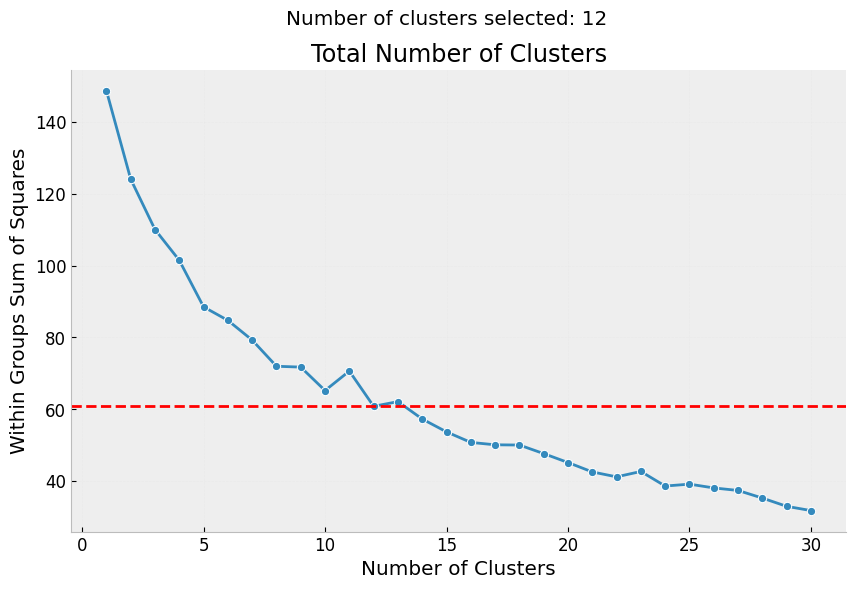

In [12]:
# Cluster result Validations (graphs)
print(cluster_results.top_solutions["sol_id"])
cluster_results.wss

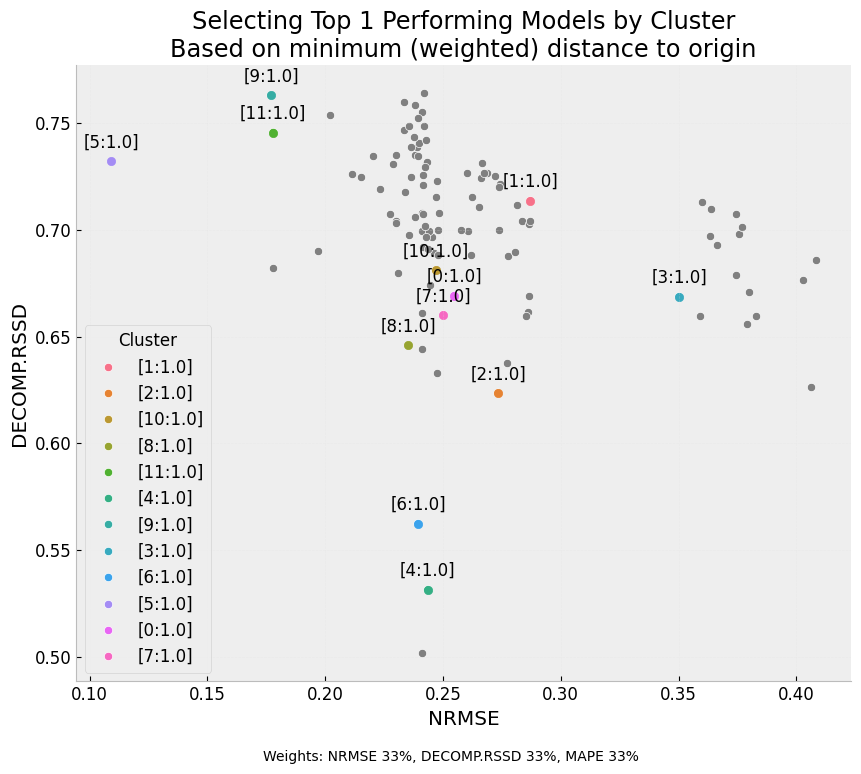

In [13]:
cluster_results.plots.top_solutions_errors_plot

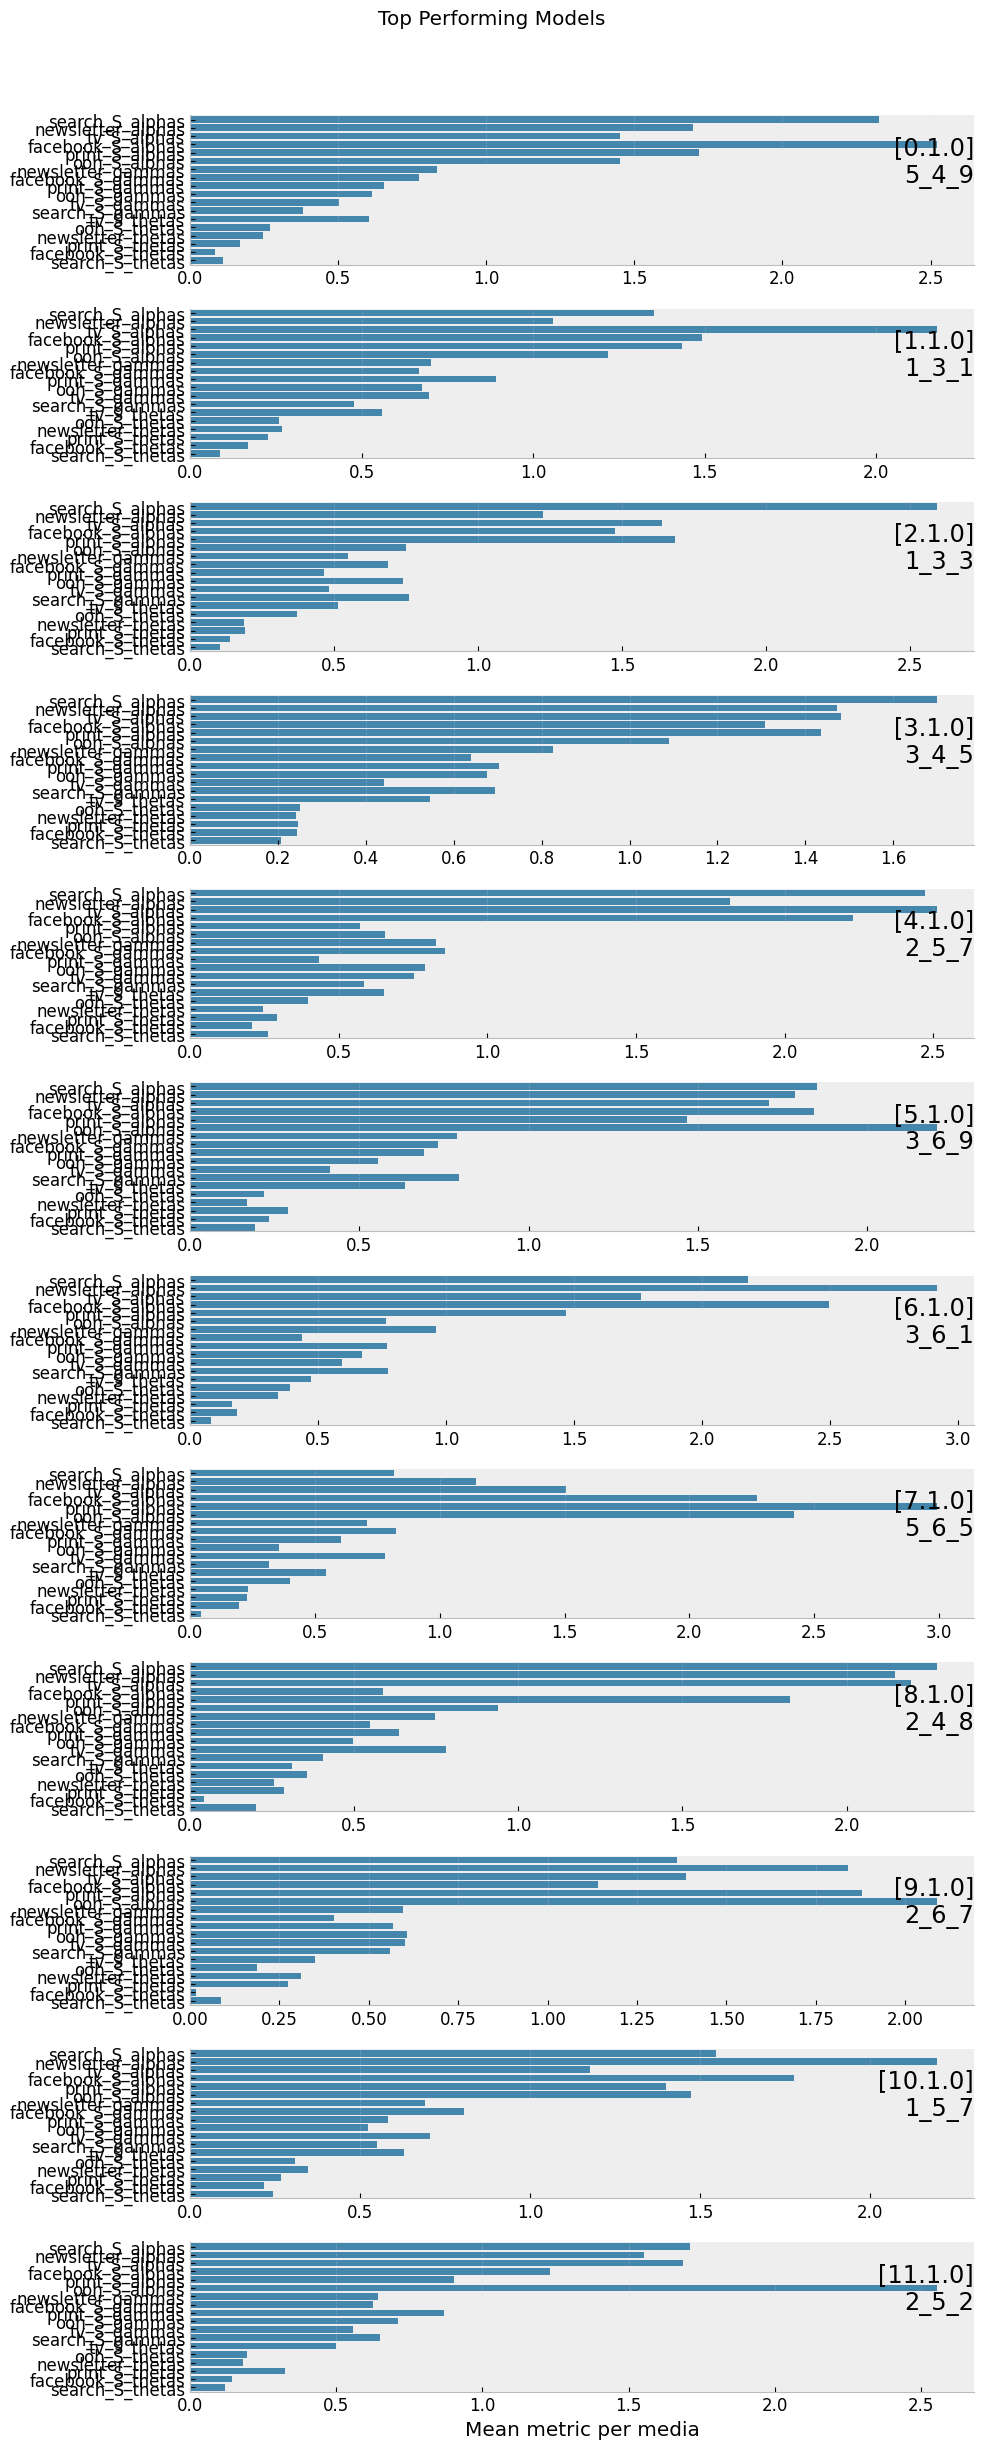

In [14]:
cluster_results.plots.top_solutions_rois_plot

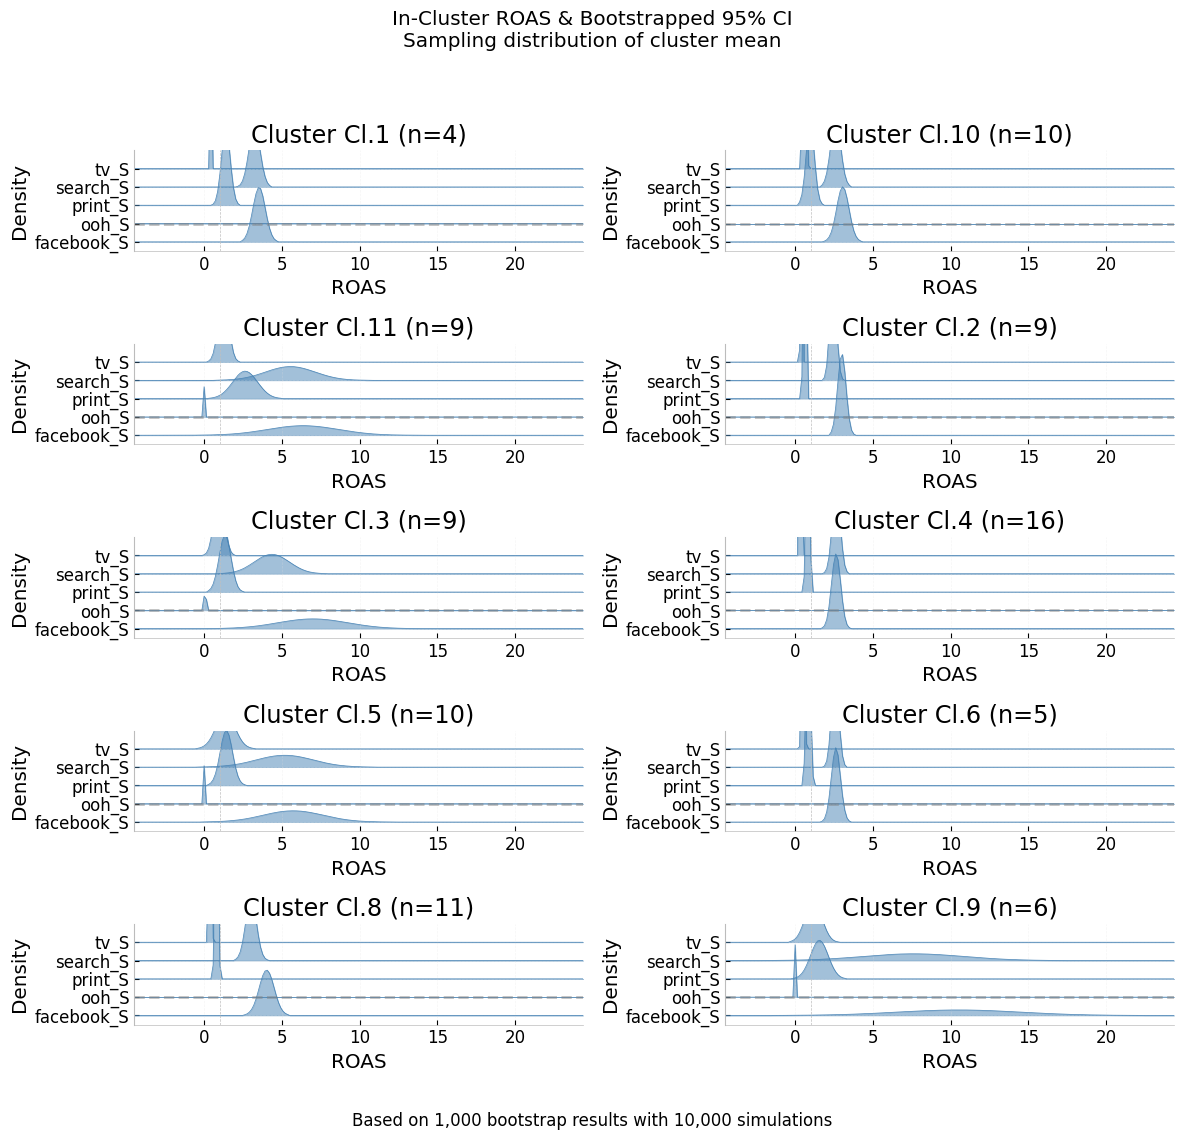

In [15]:
cluster_results.cluster_ci.clusters_confidence_interval_plot

### Process Pareto Clustered Results for Allocator

In [16]:
from robyn.modeling.pareto.pareto_utils import ParetoUtils

utils = ParetoUtils()
filtered_pareto_results = utils.process_pareto_clustered_results(
    pareto_result, clustered_result=cluster_results, ran_cluster=True, ran_calibration=False
)

# One Pager Results

2024-11-18 16:02:16,686 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-18 16:02:16,687 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-18 16:02:16,688 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-18 16:02:16,688 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-18 16:02:16,688 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-18 16:02:16,689 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-18 16:02:16,689 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-18 16:02:16,689 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-18 16:02:16,911 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualiz

[<Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>,
 <Figure size 2000x1500 with 8 Axes>]

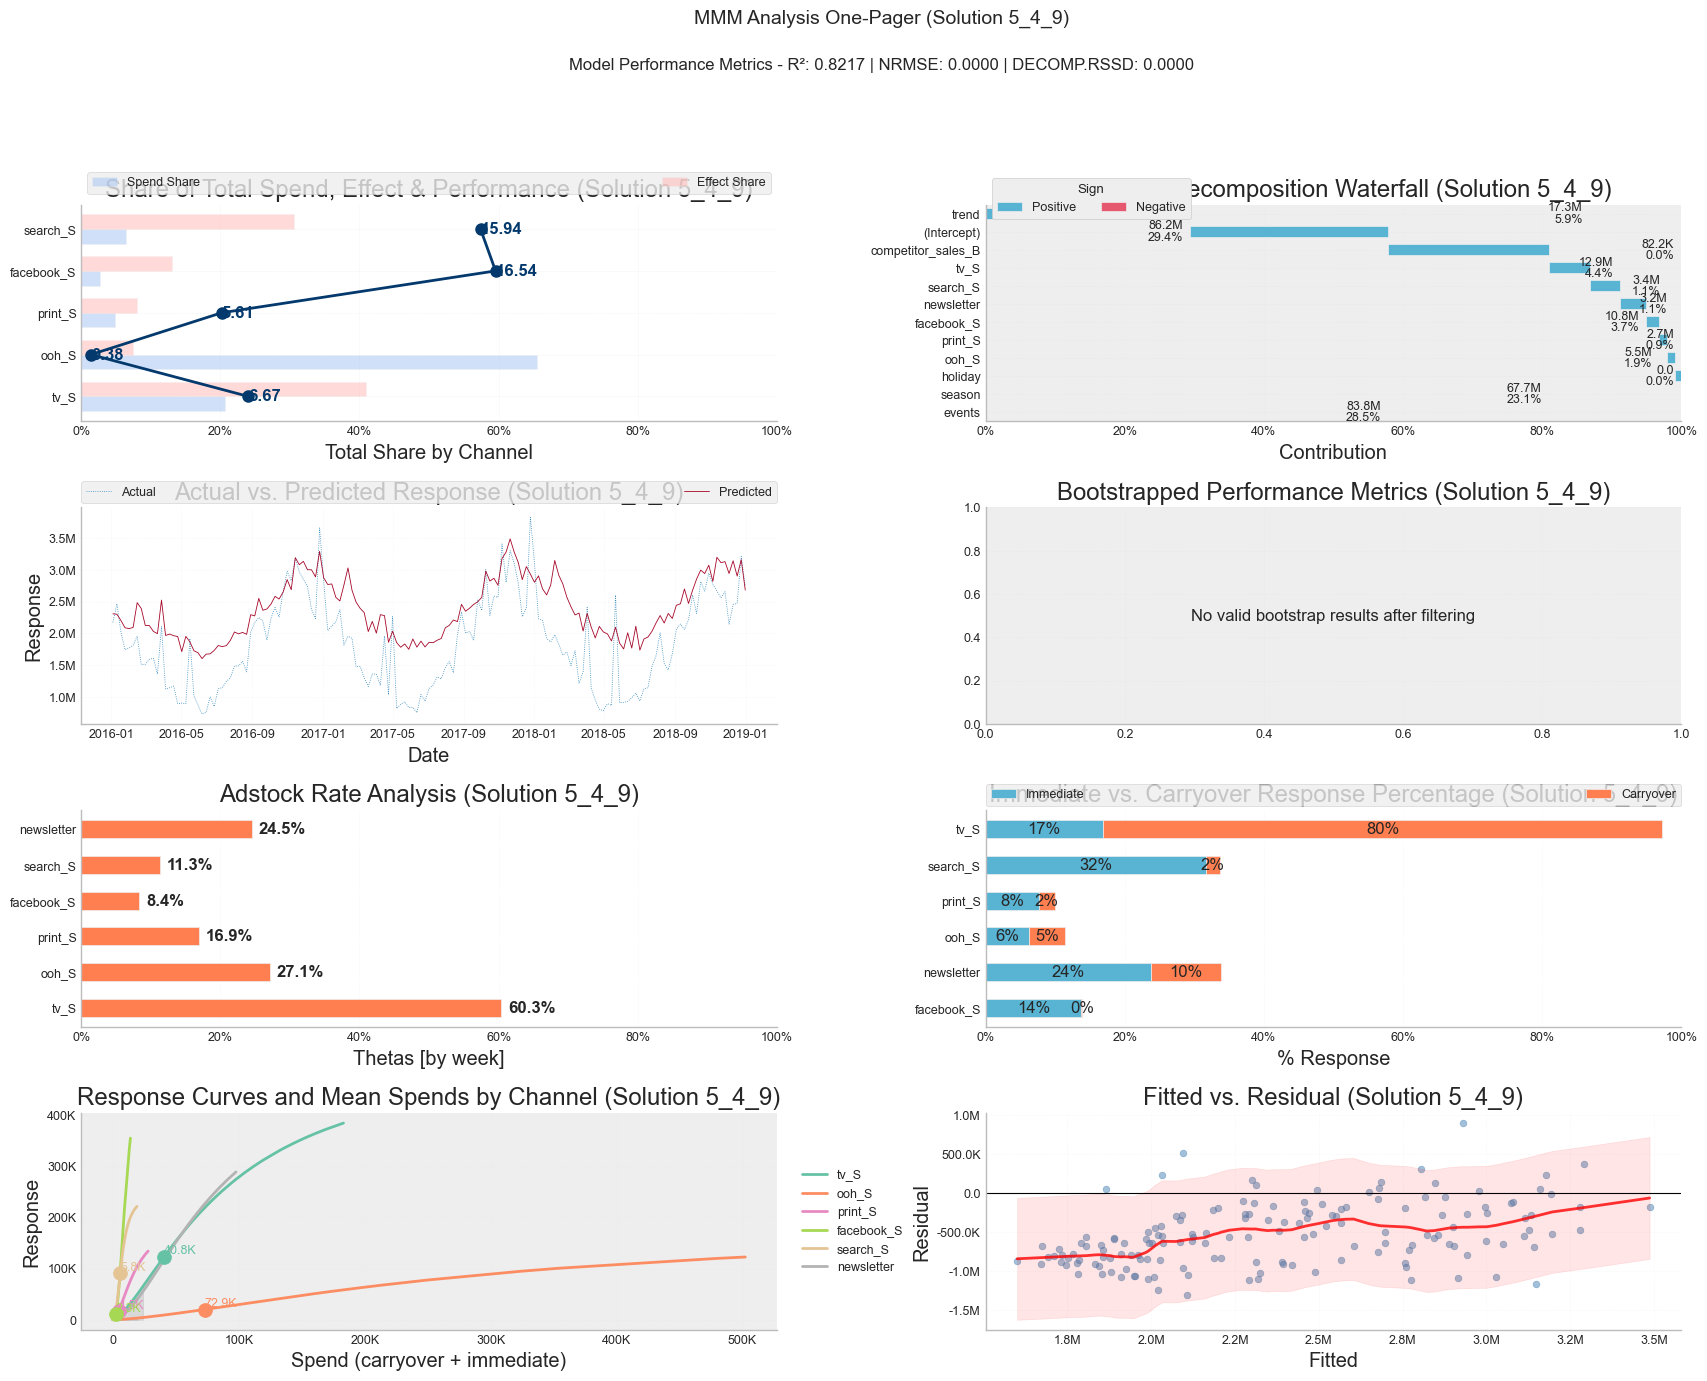

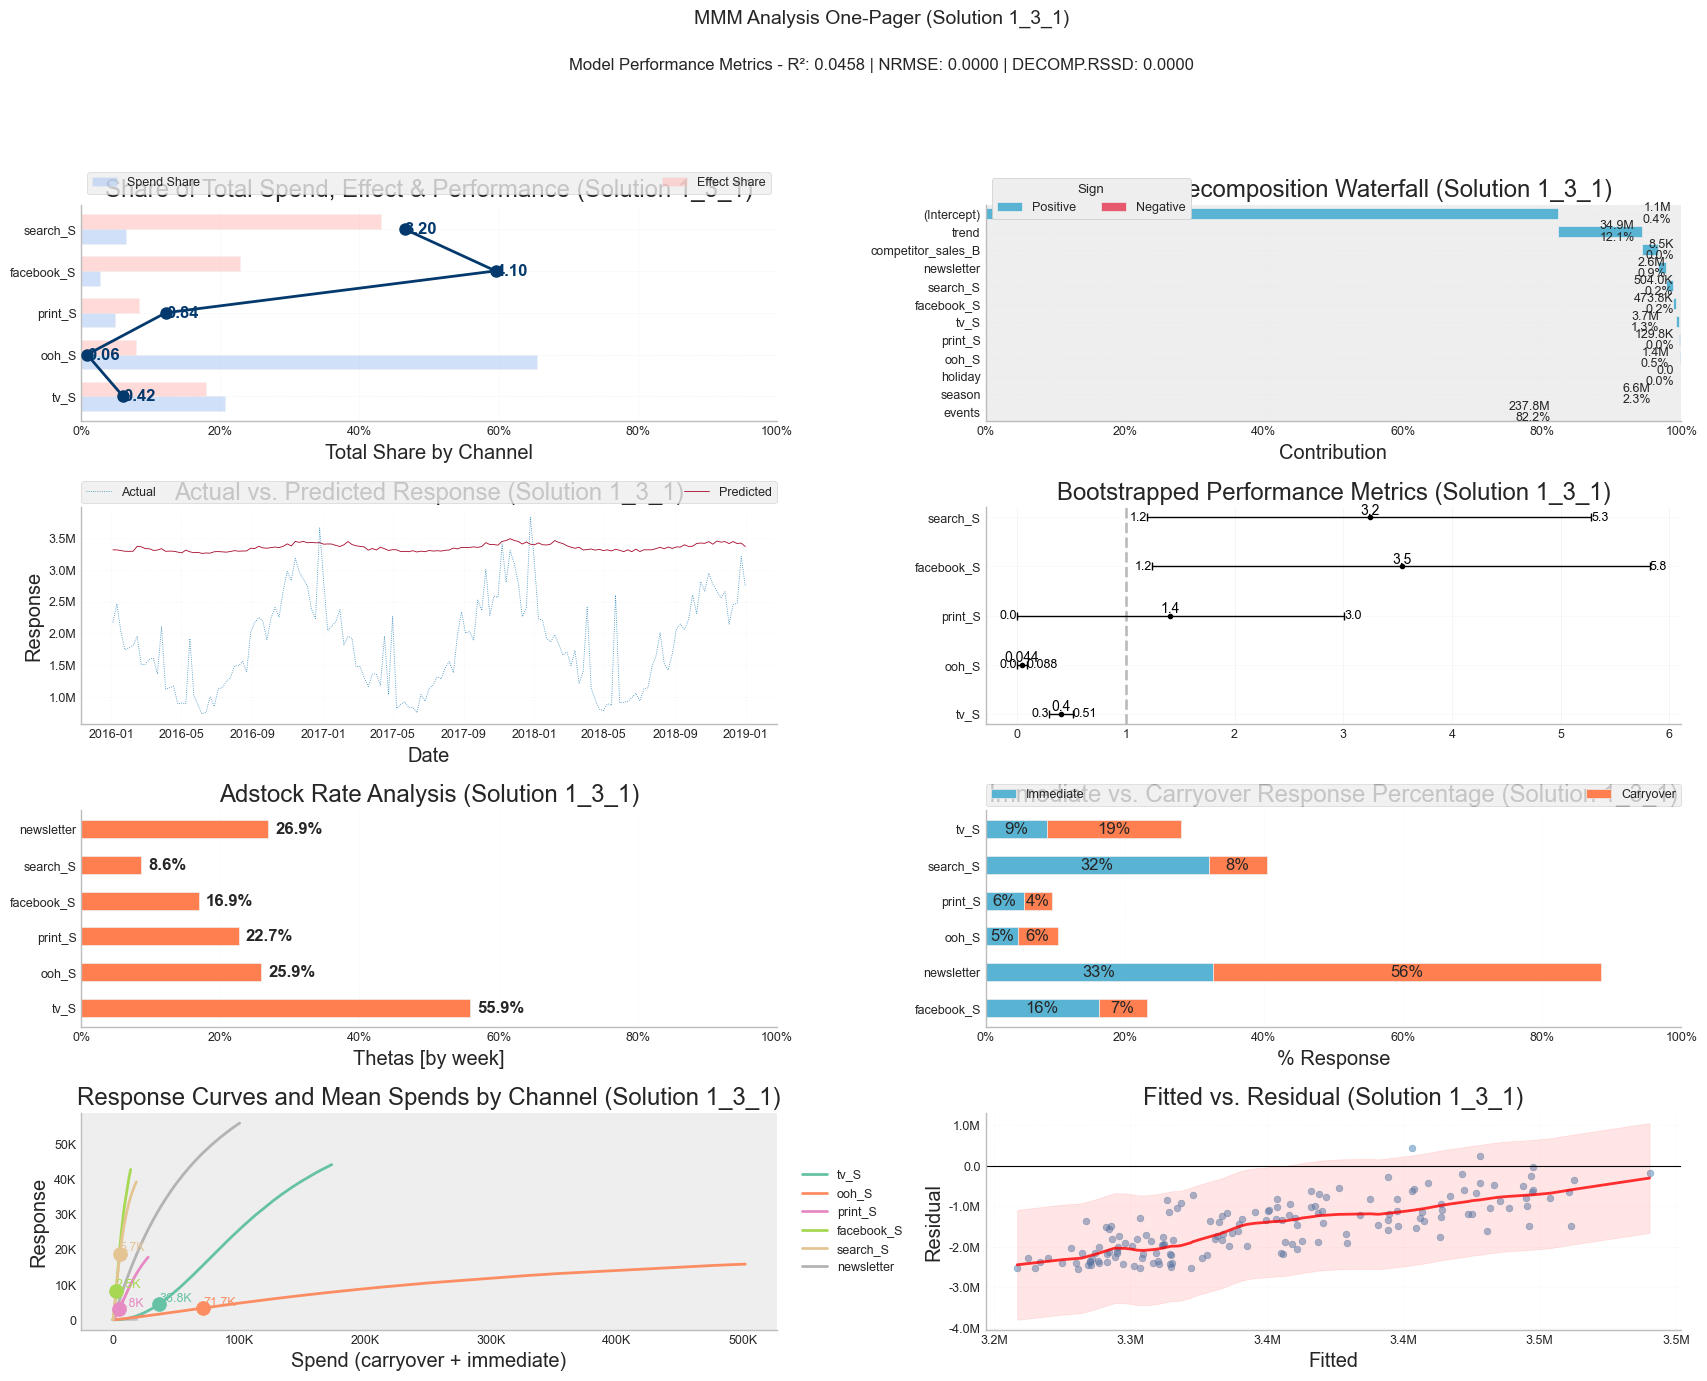

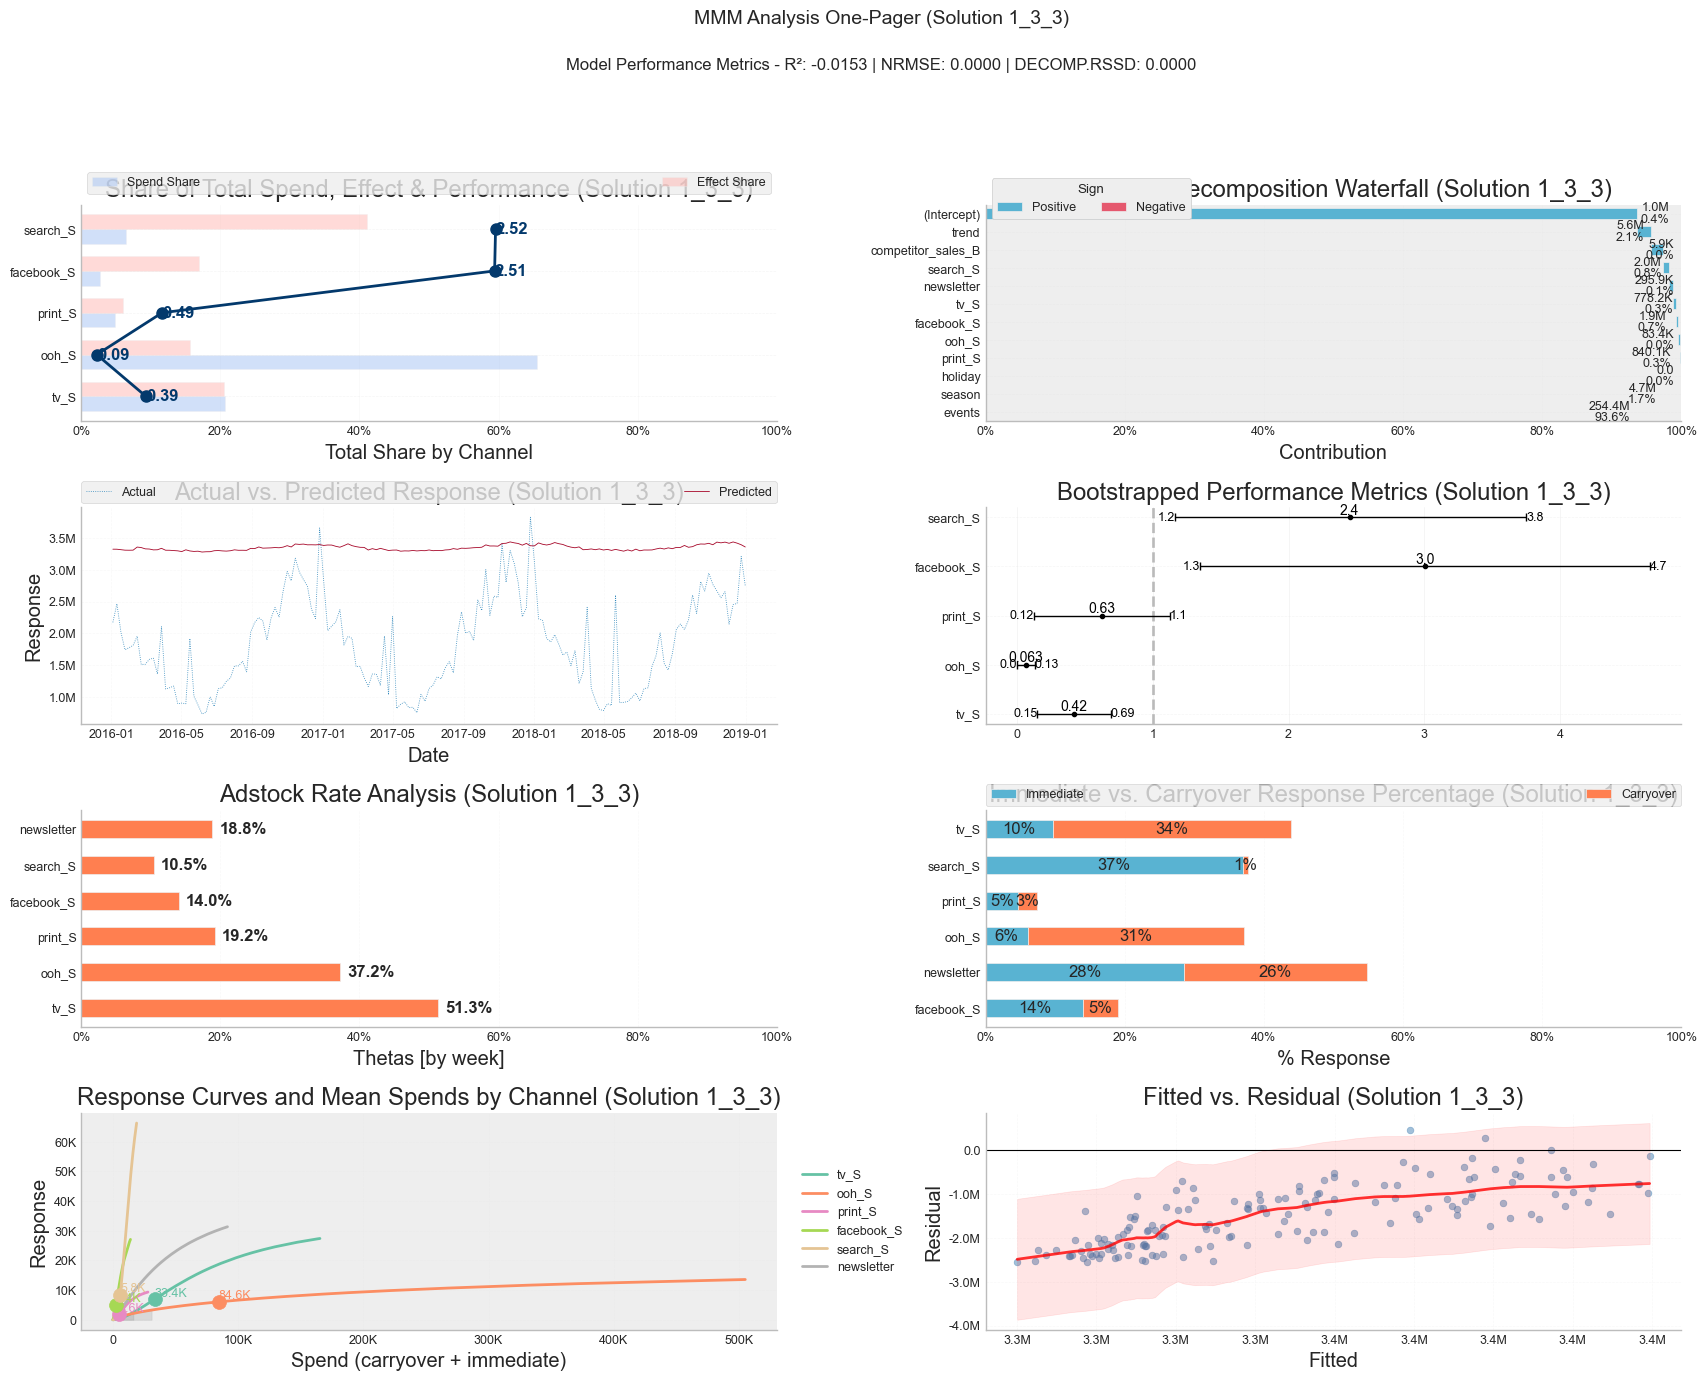

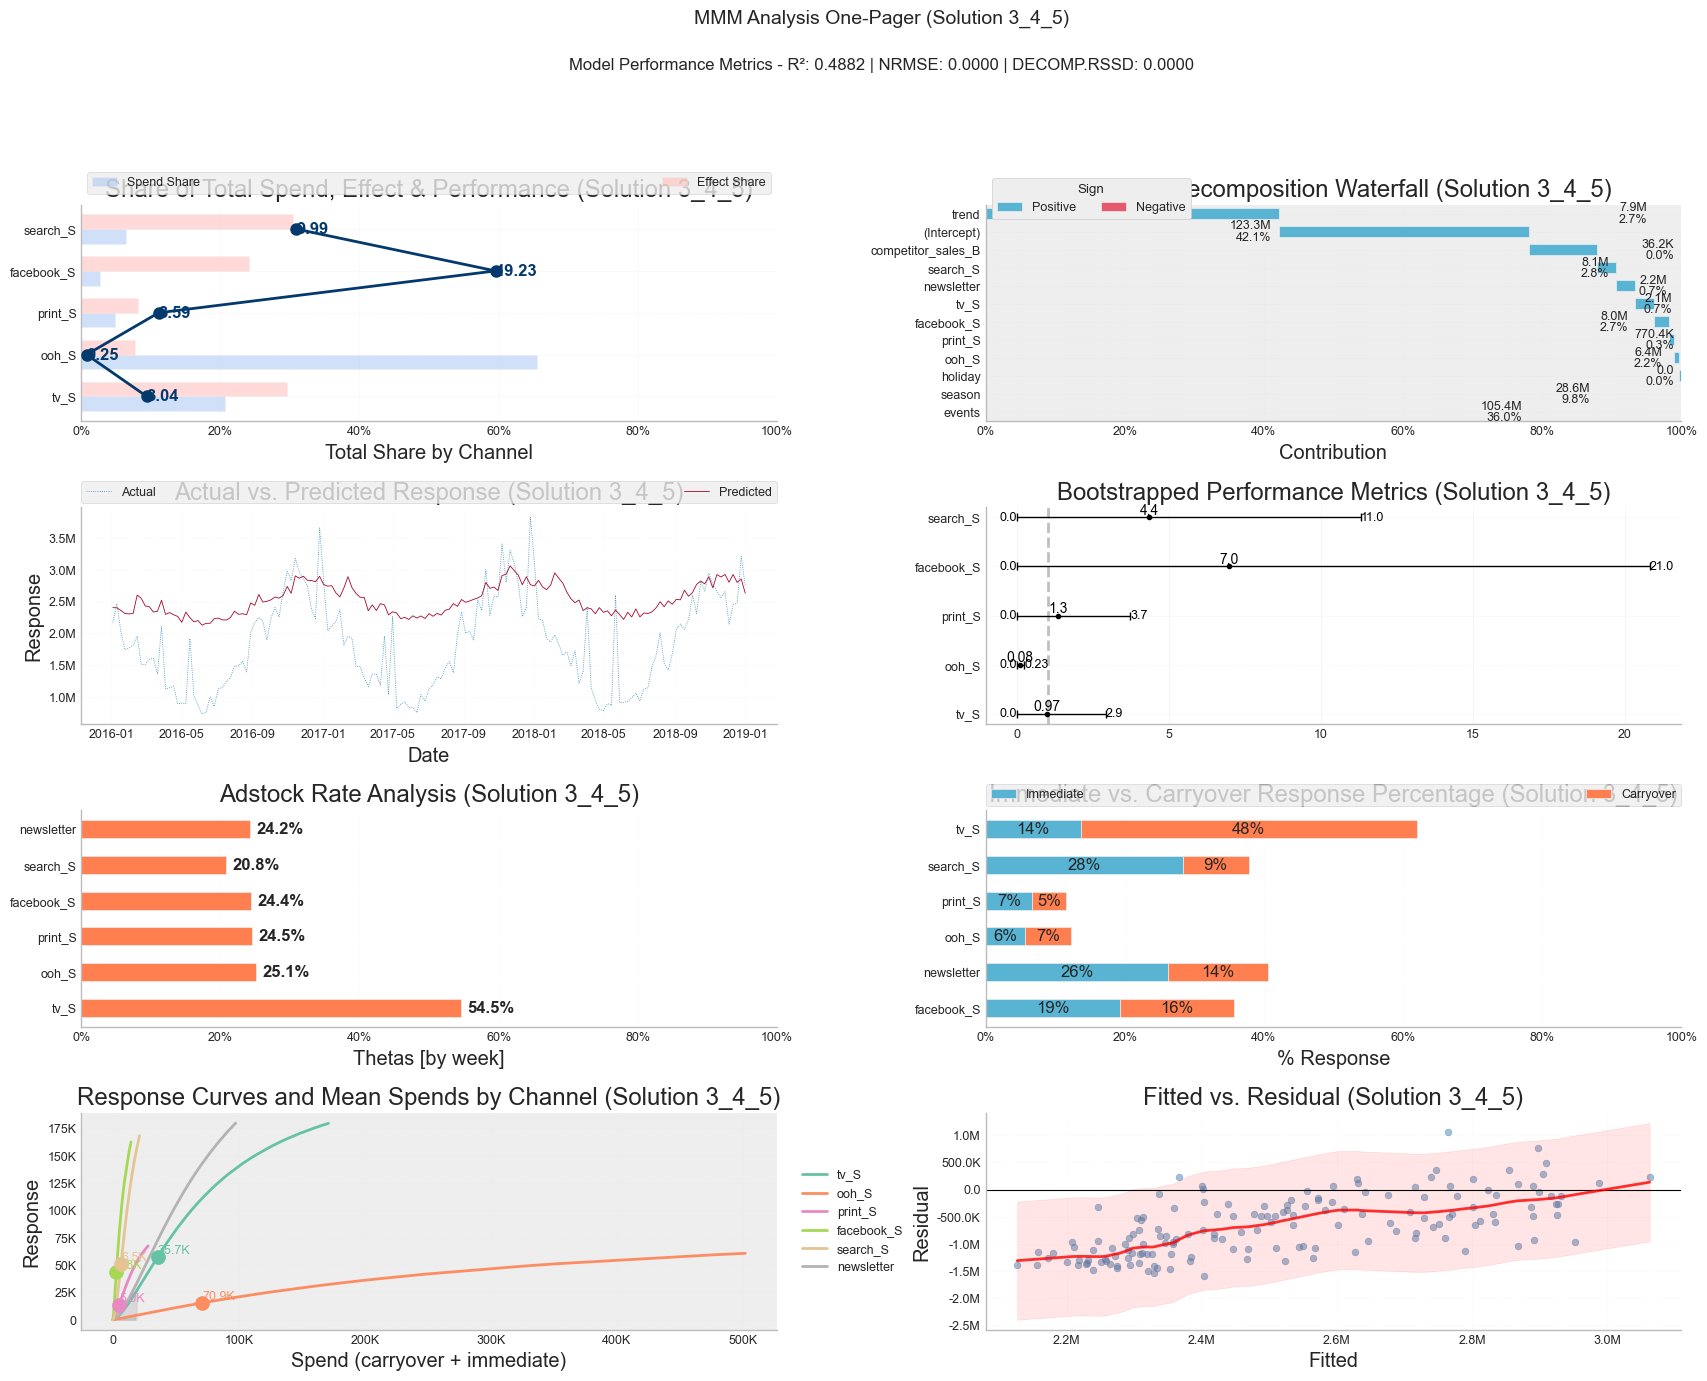

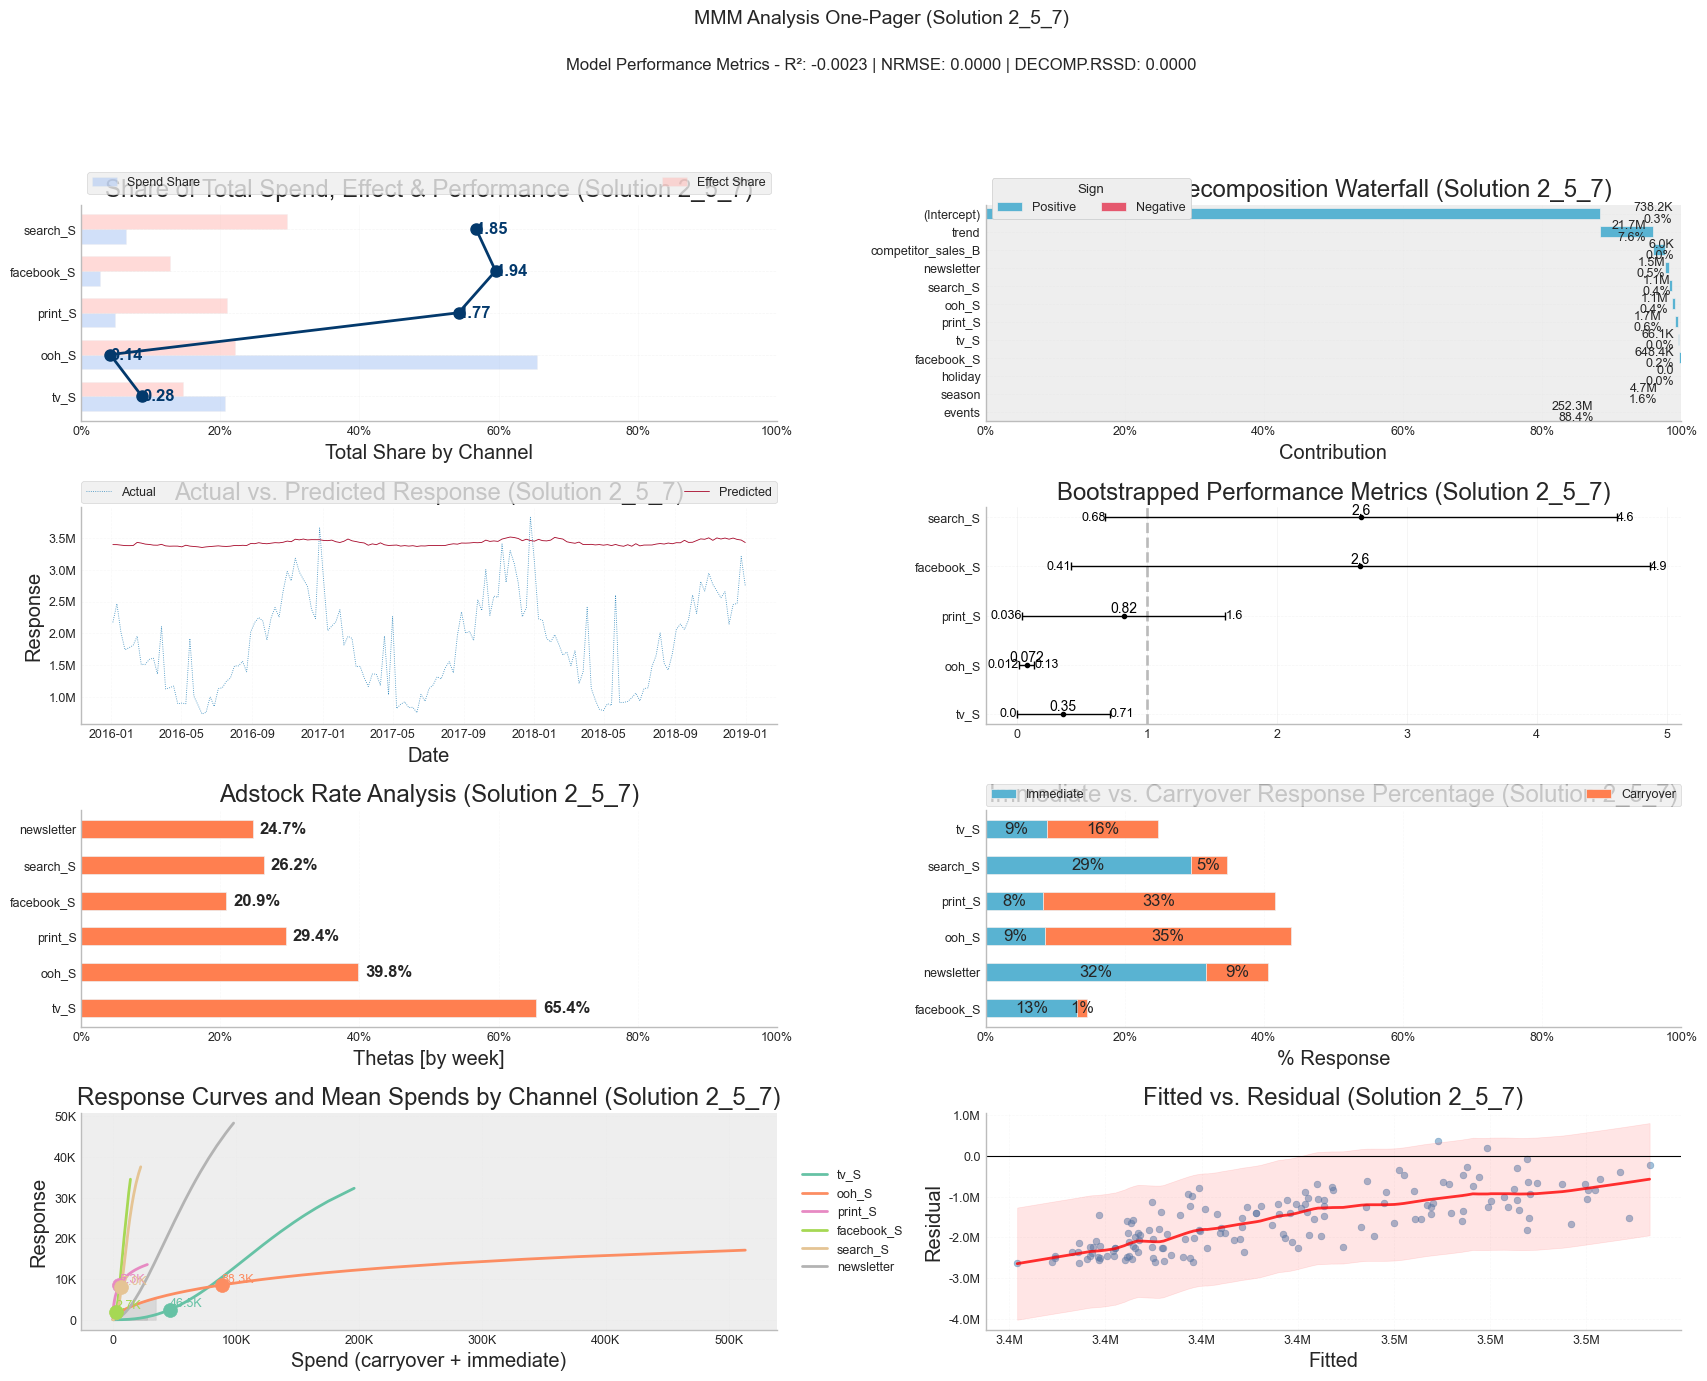

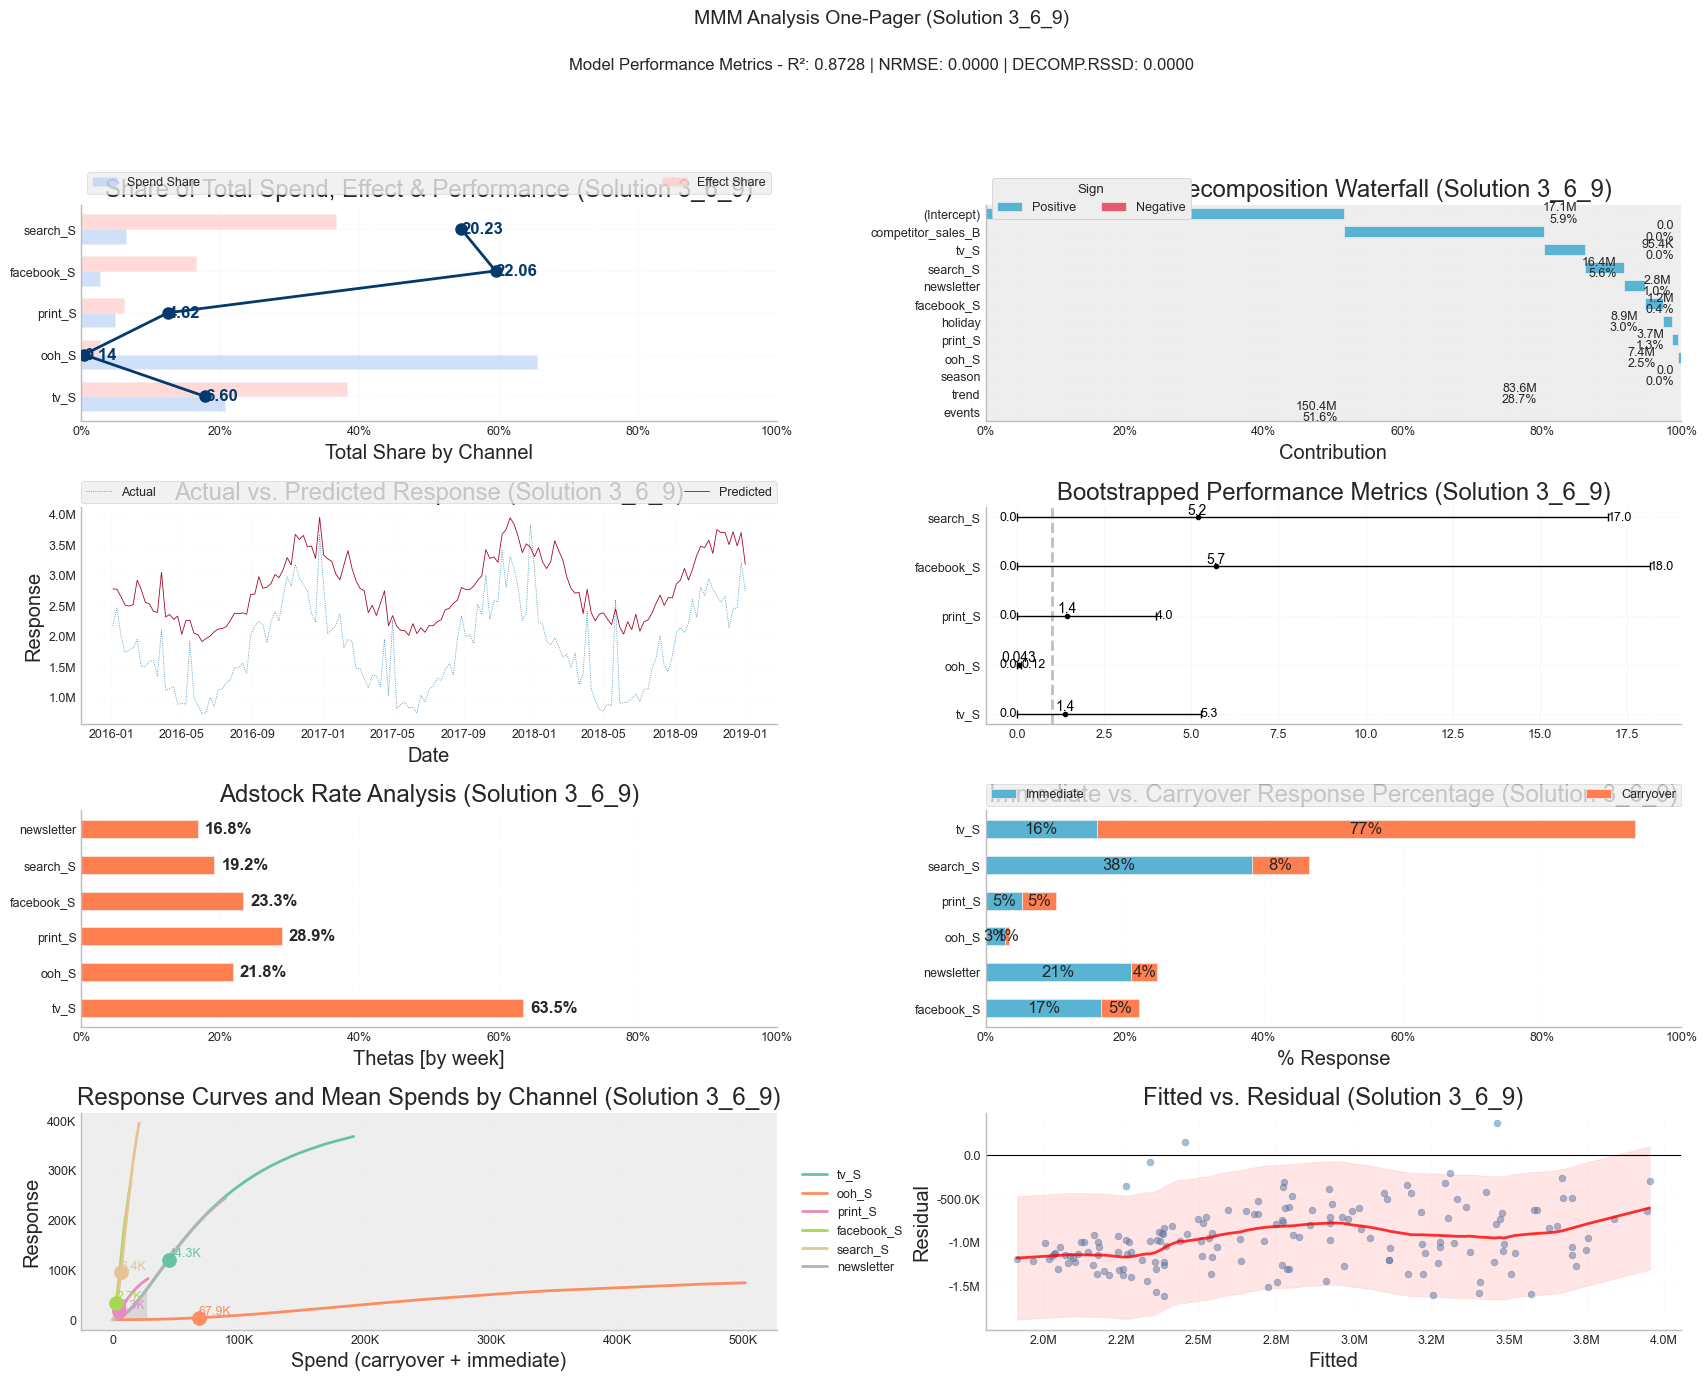

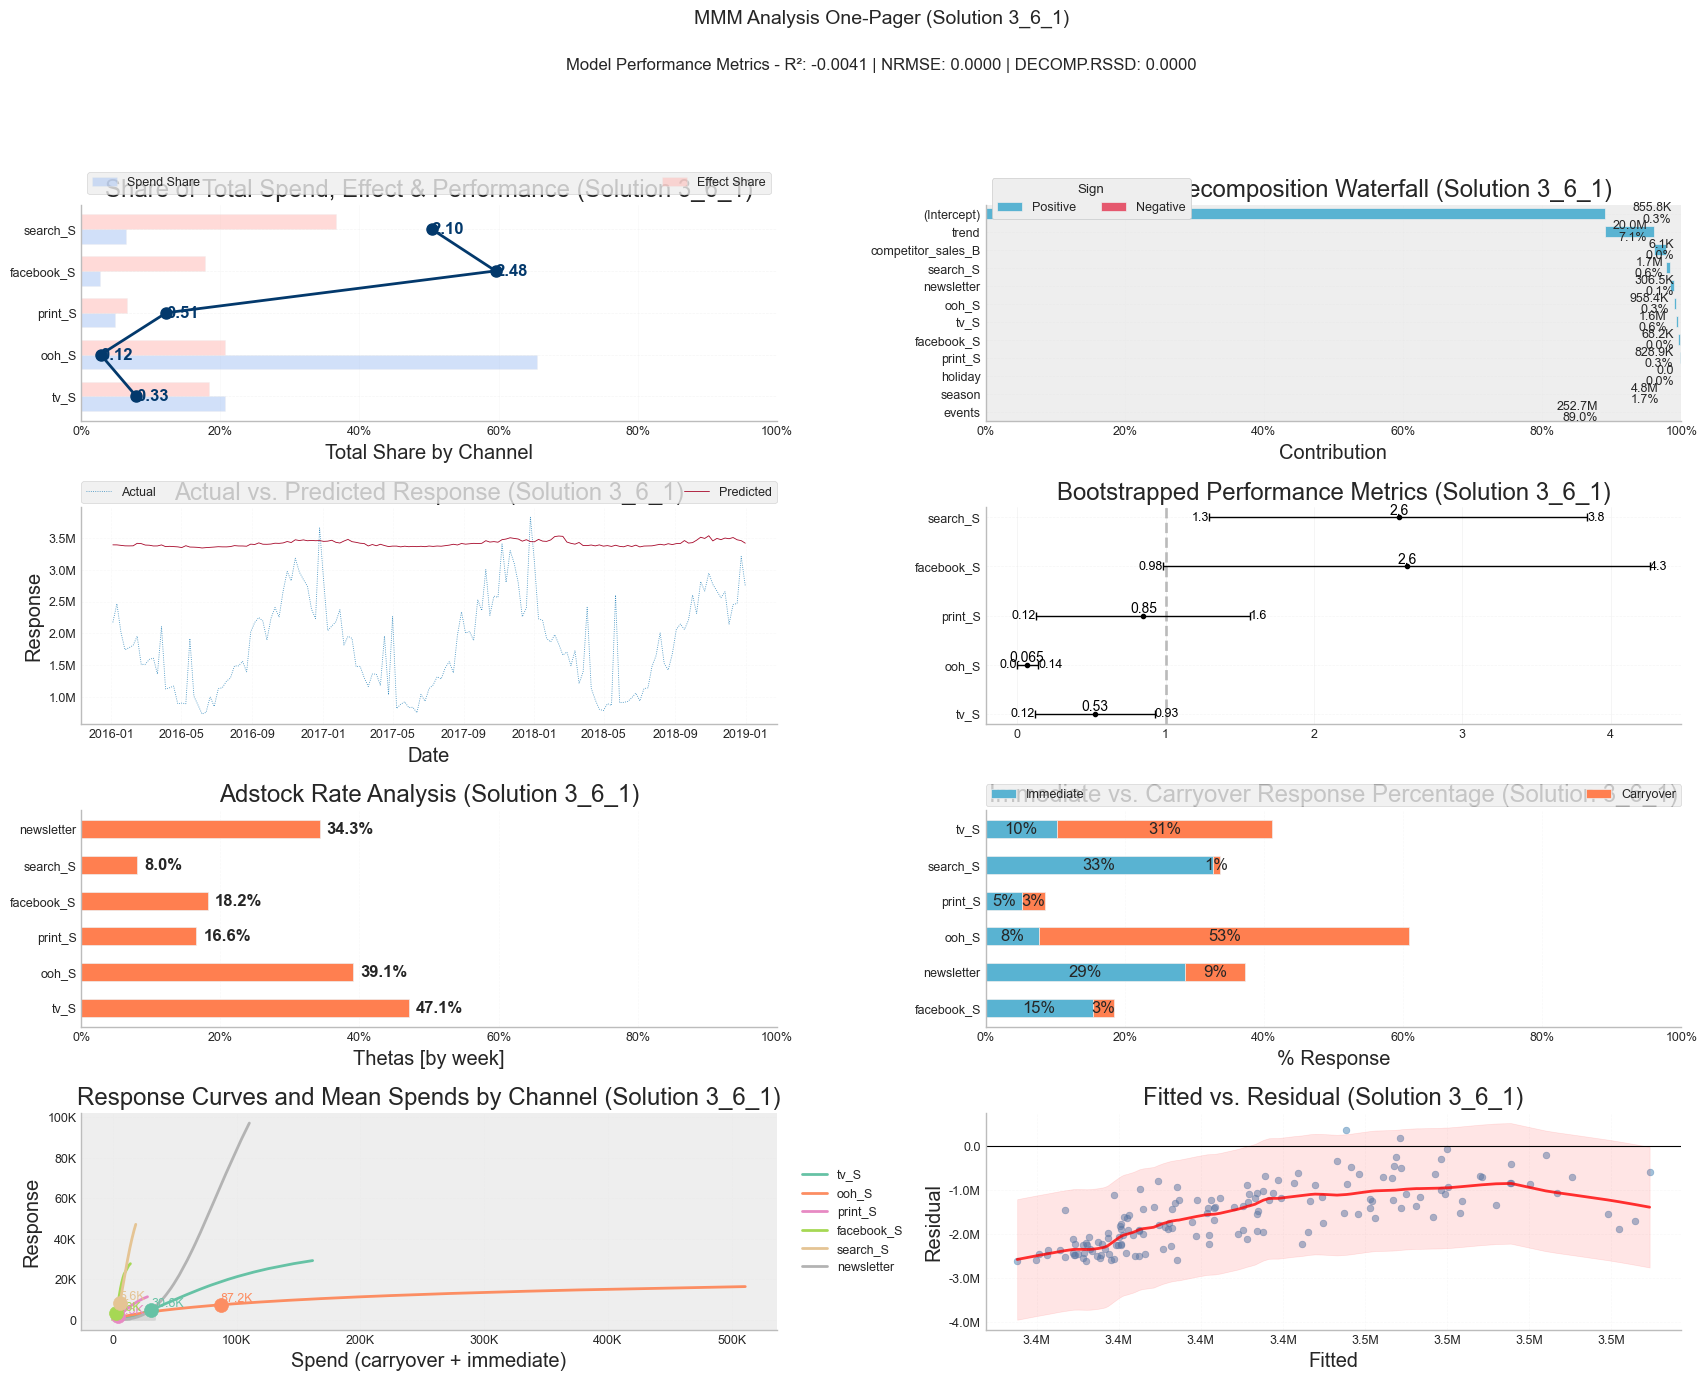

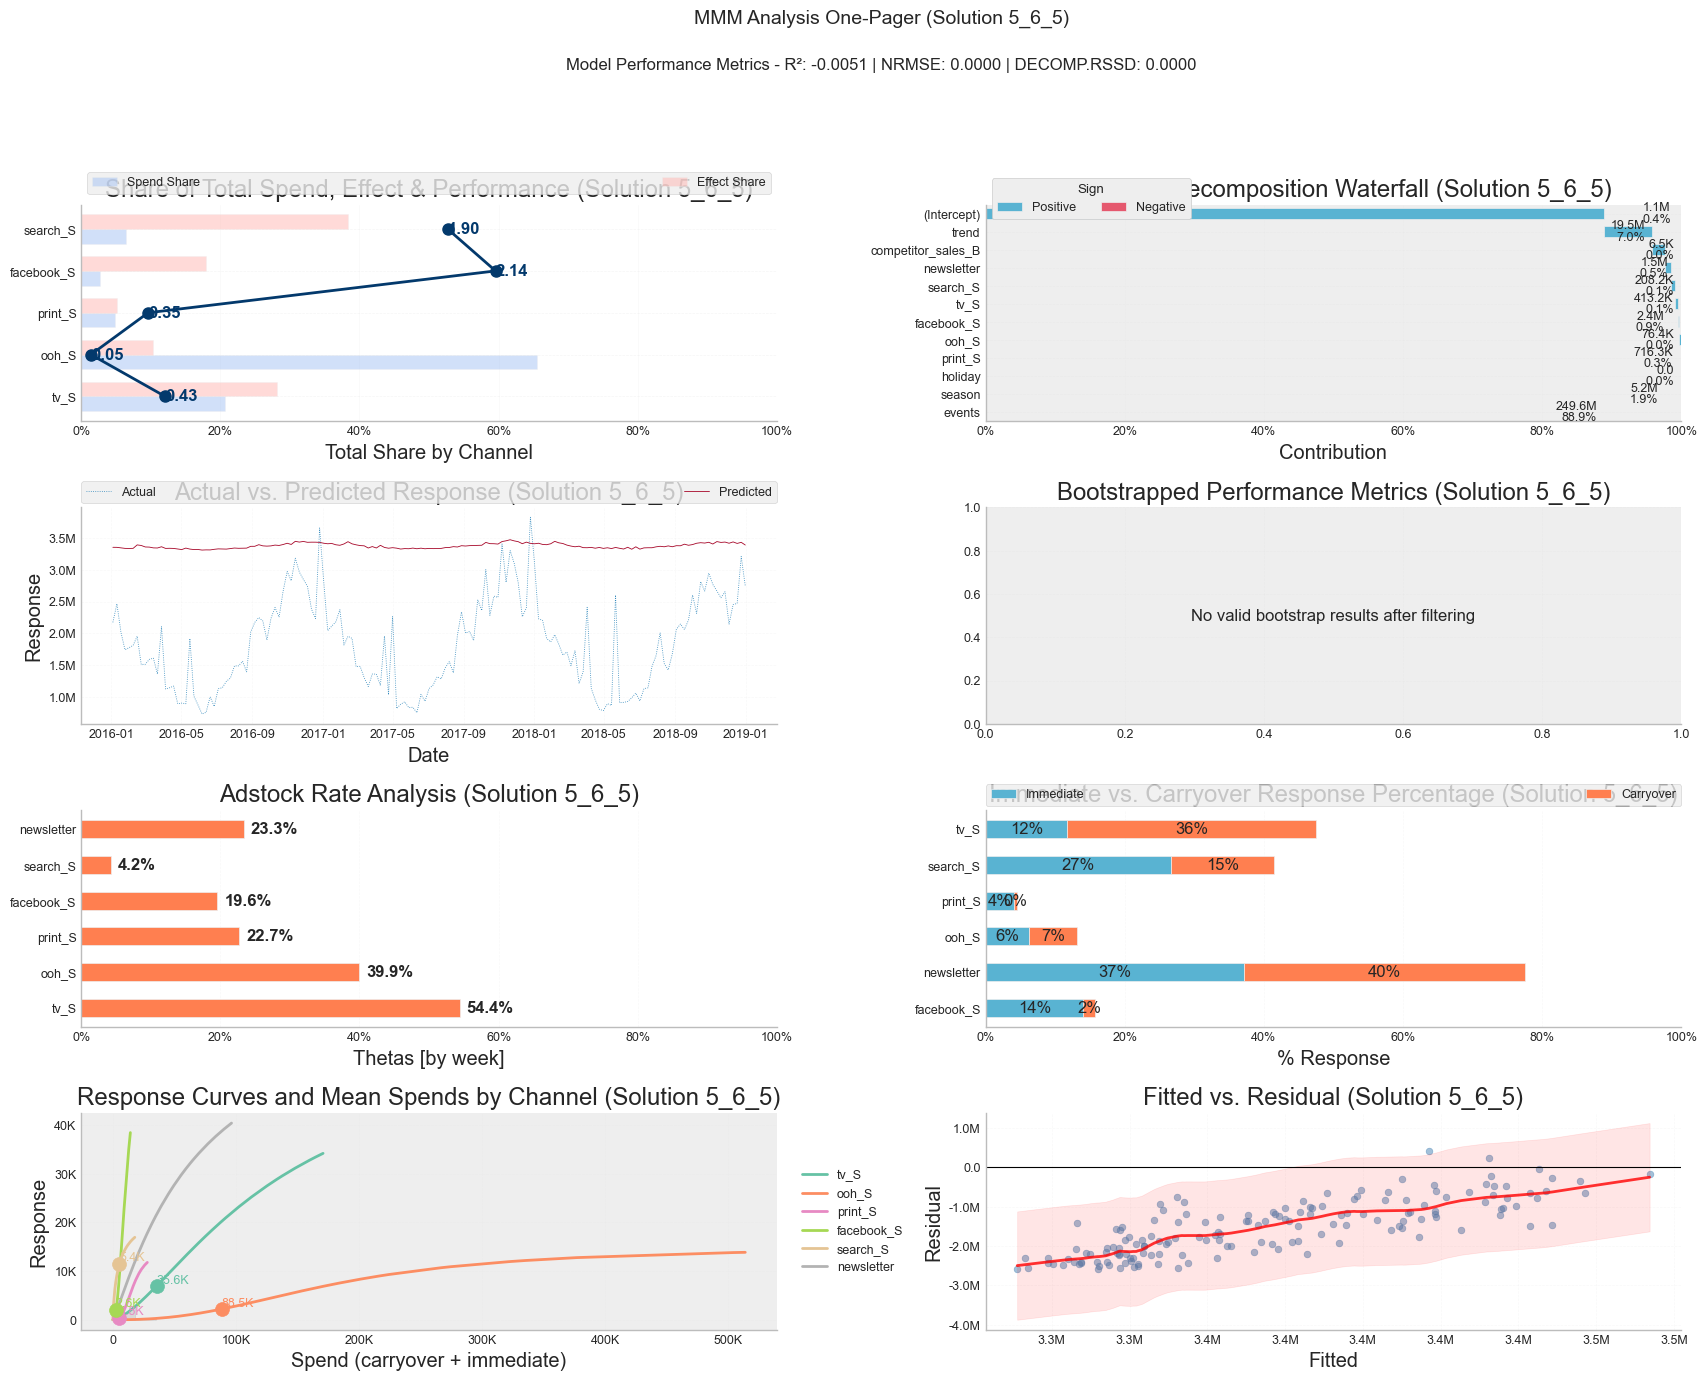

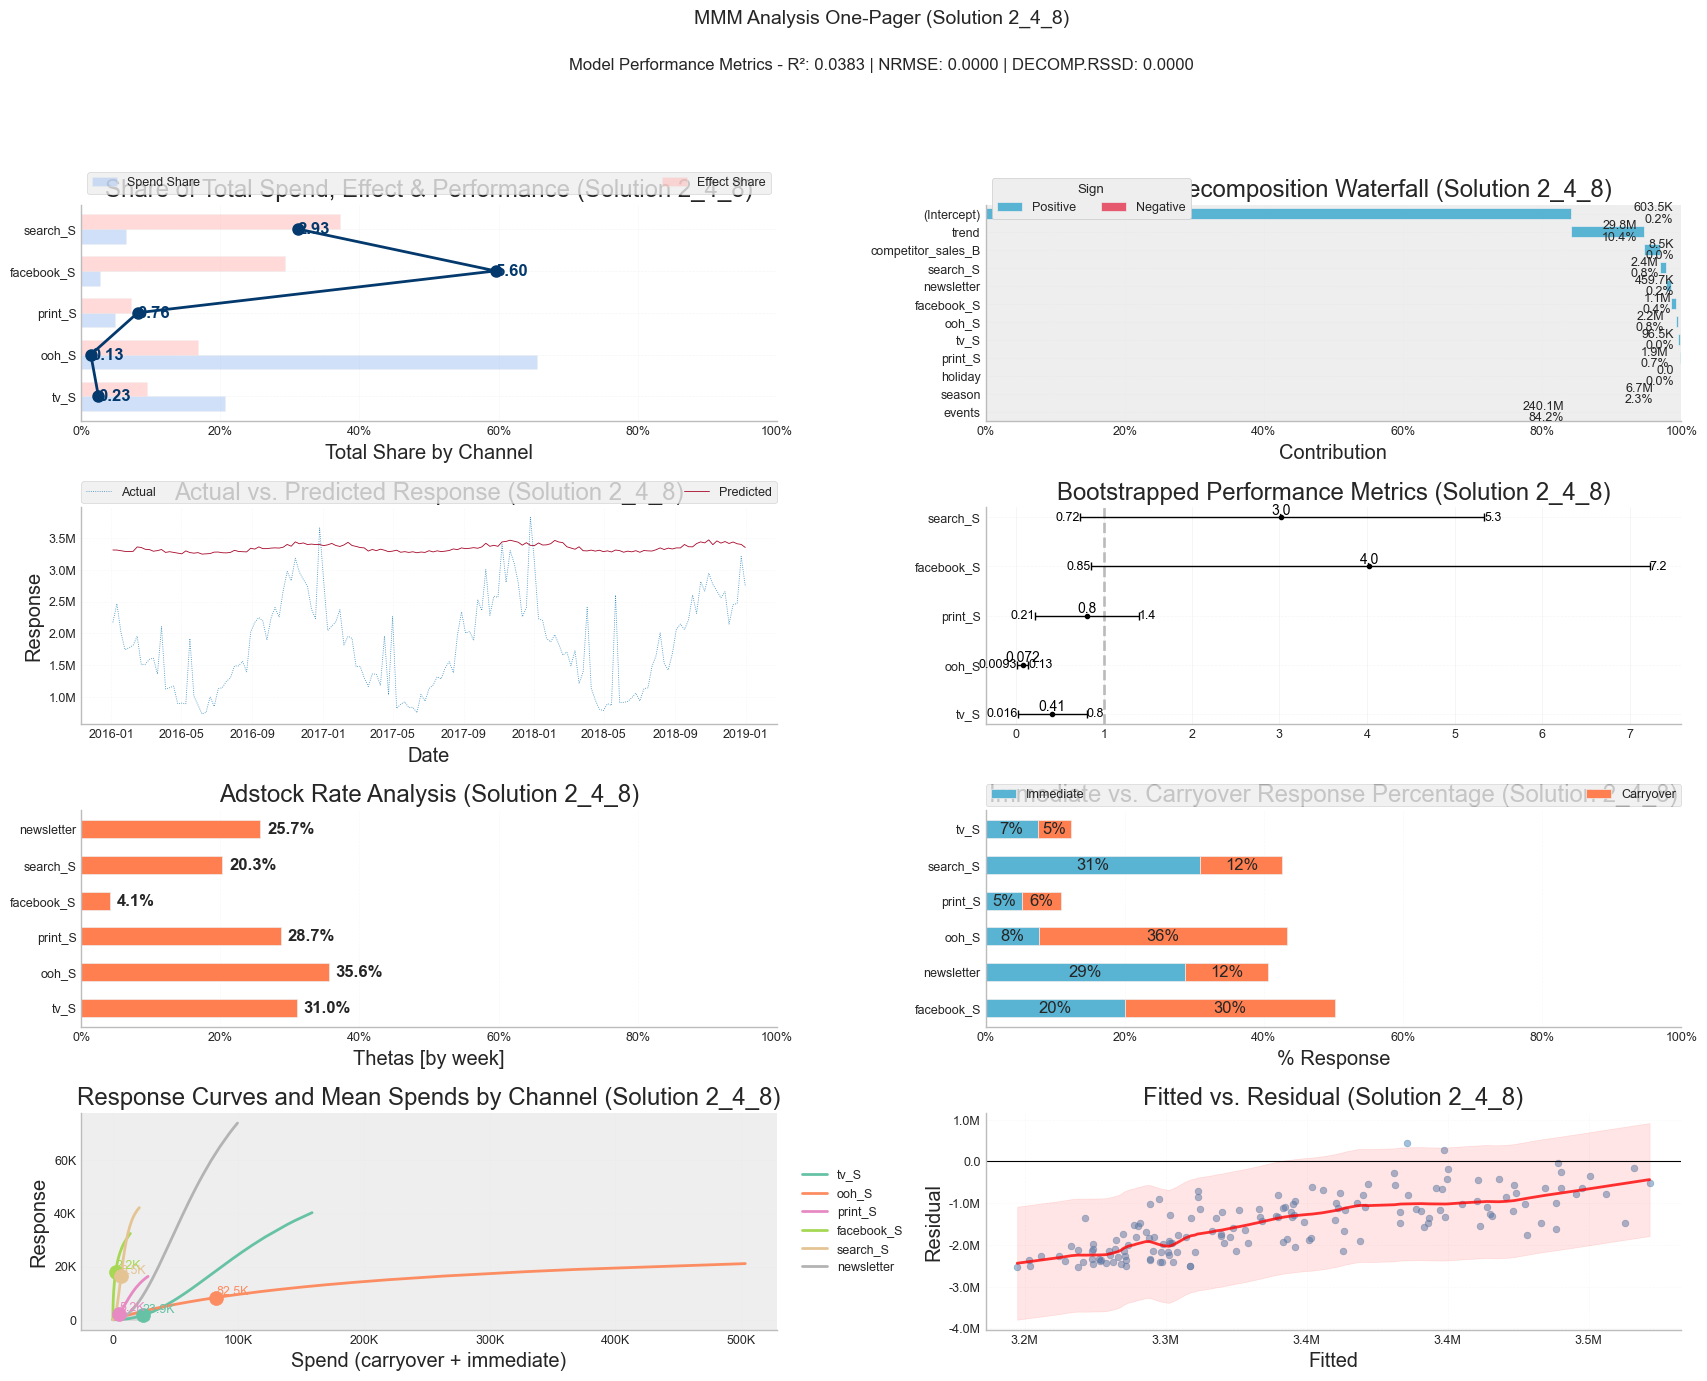

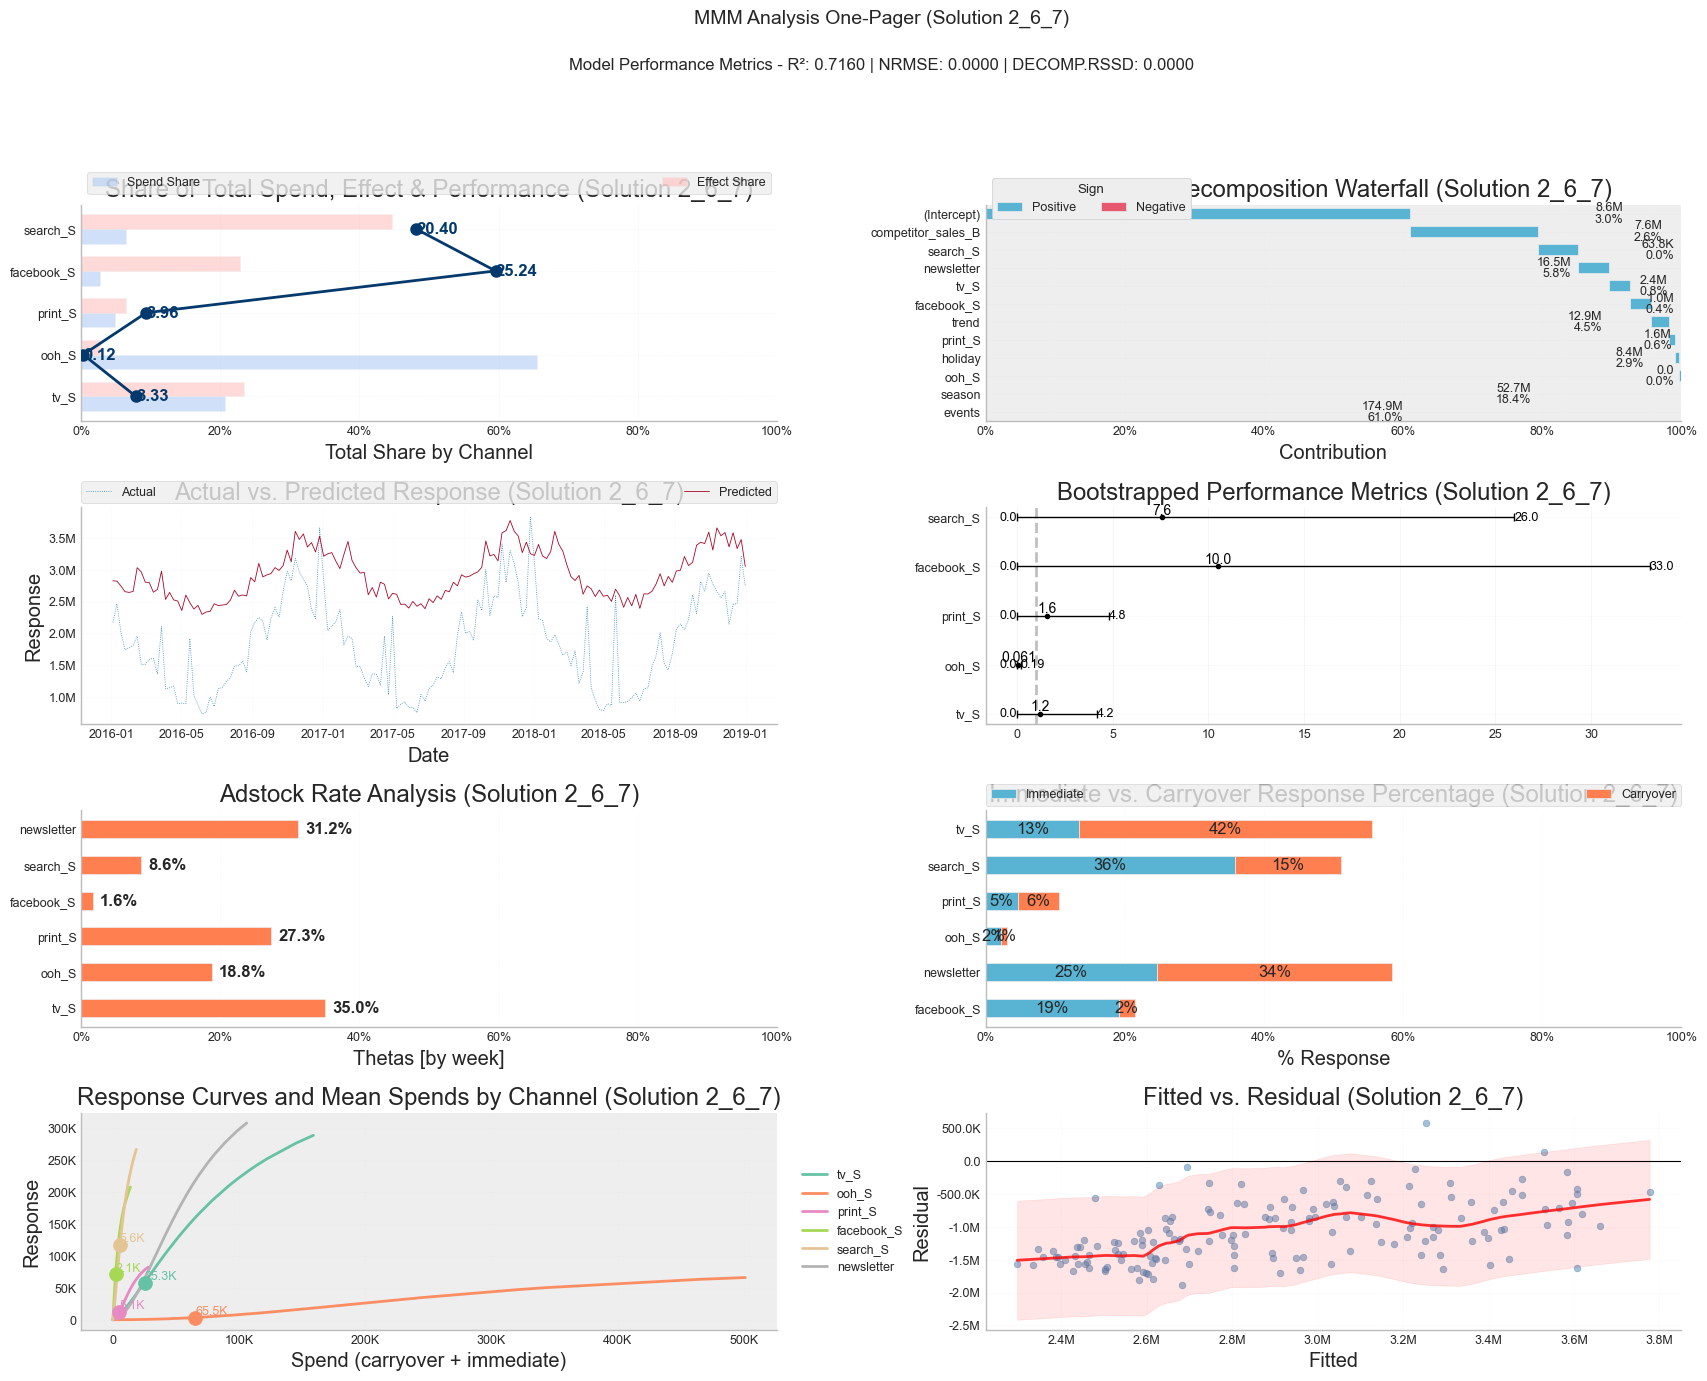

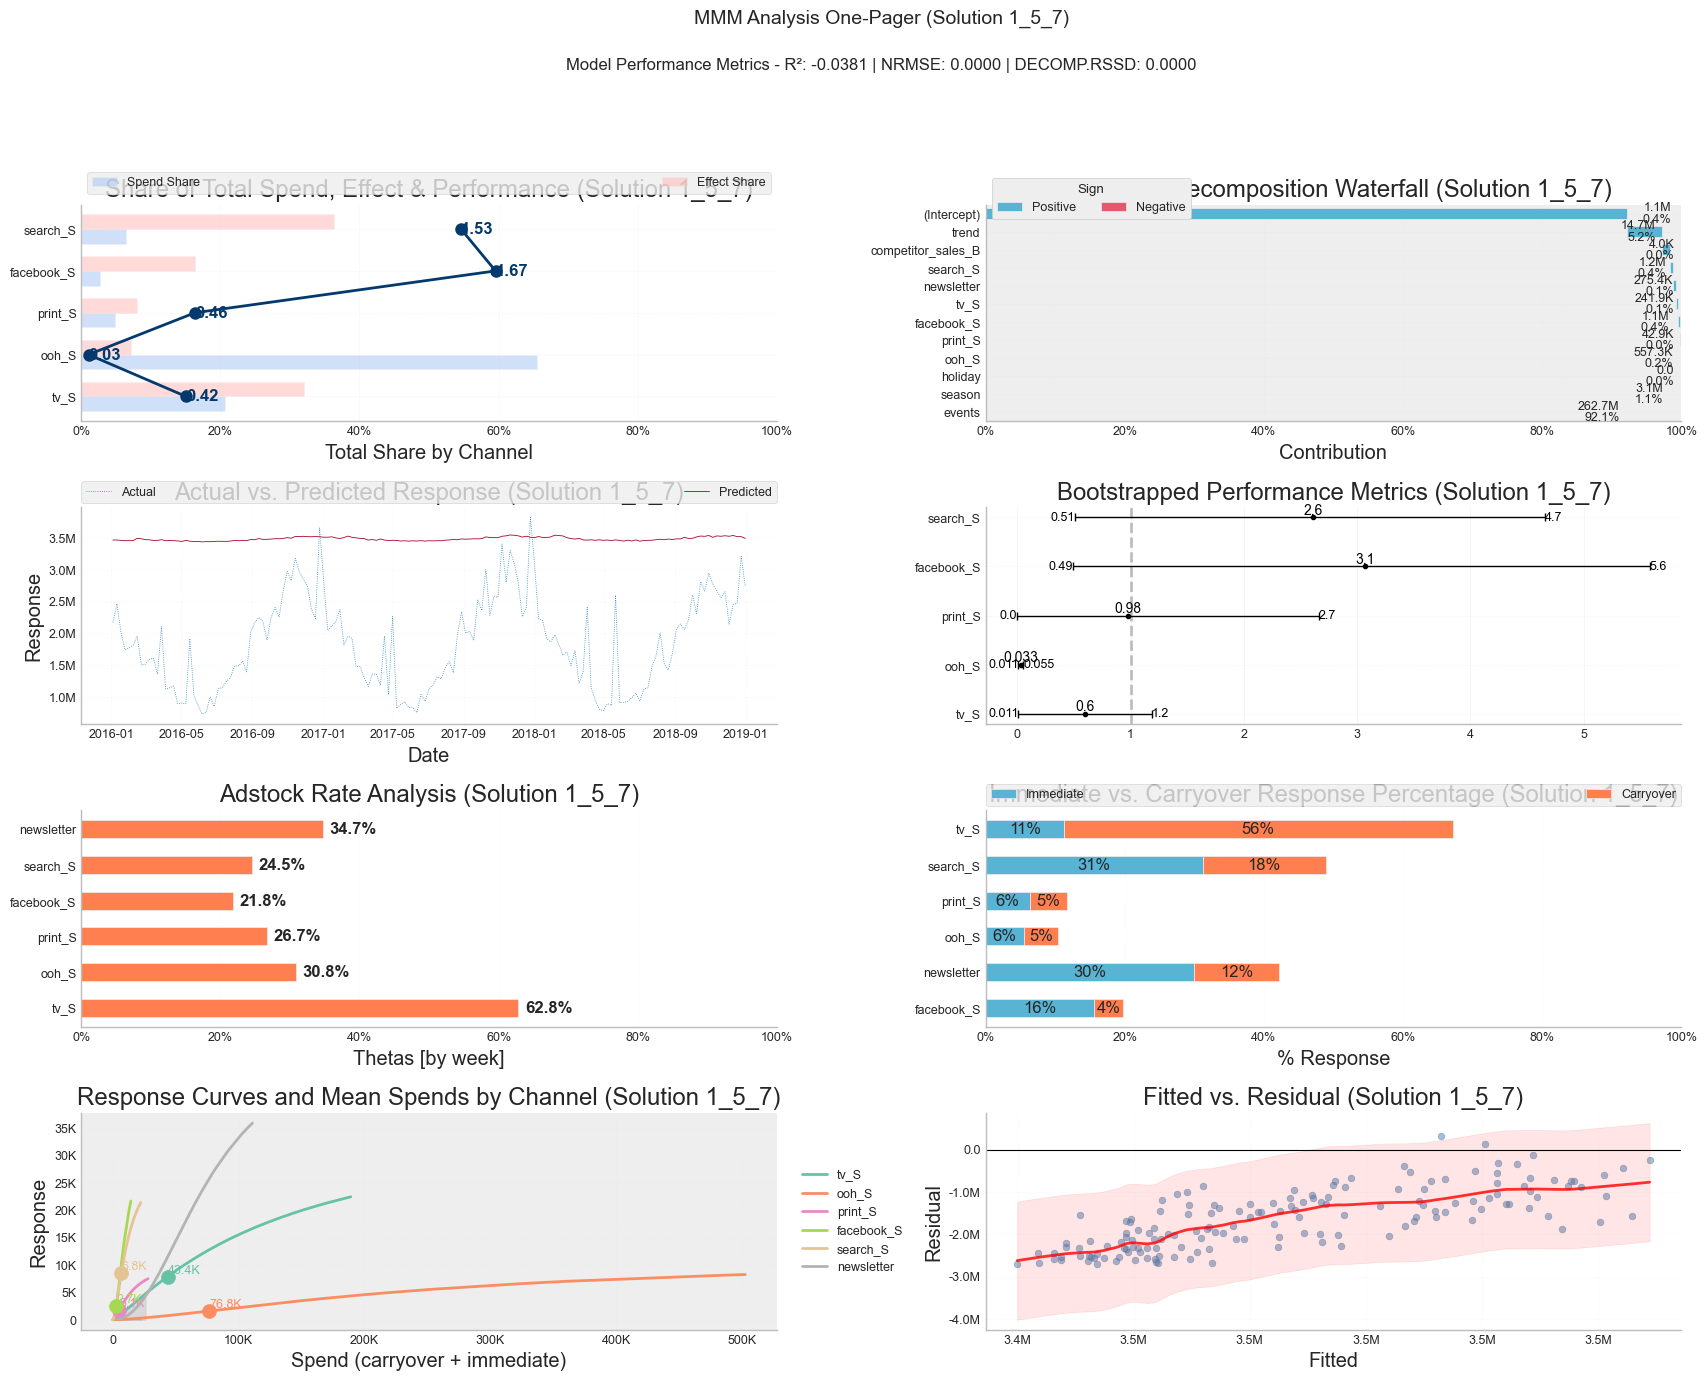

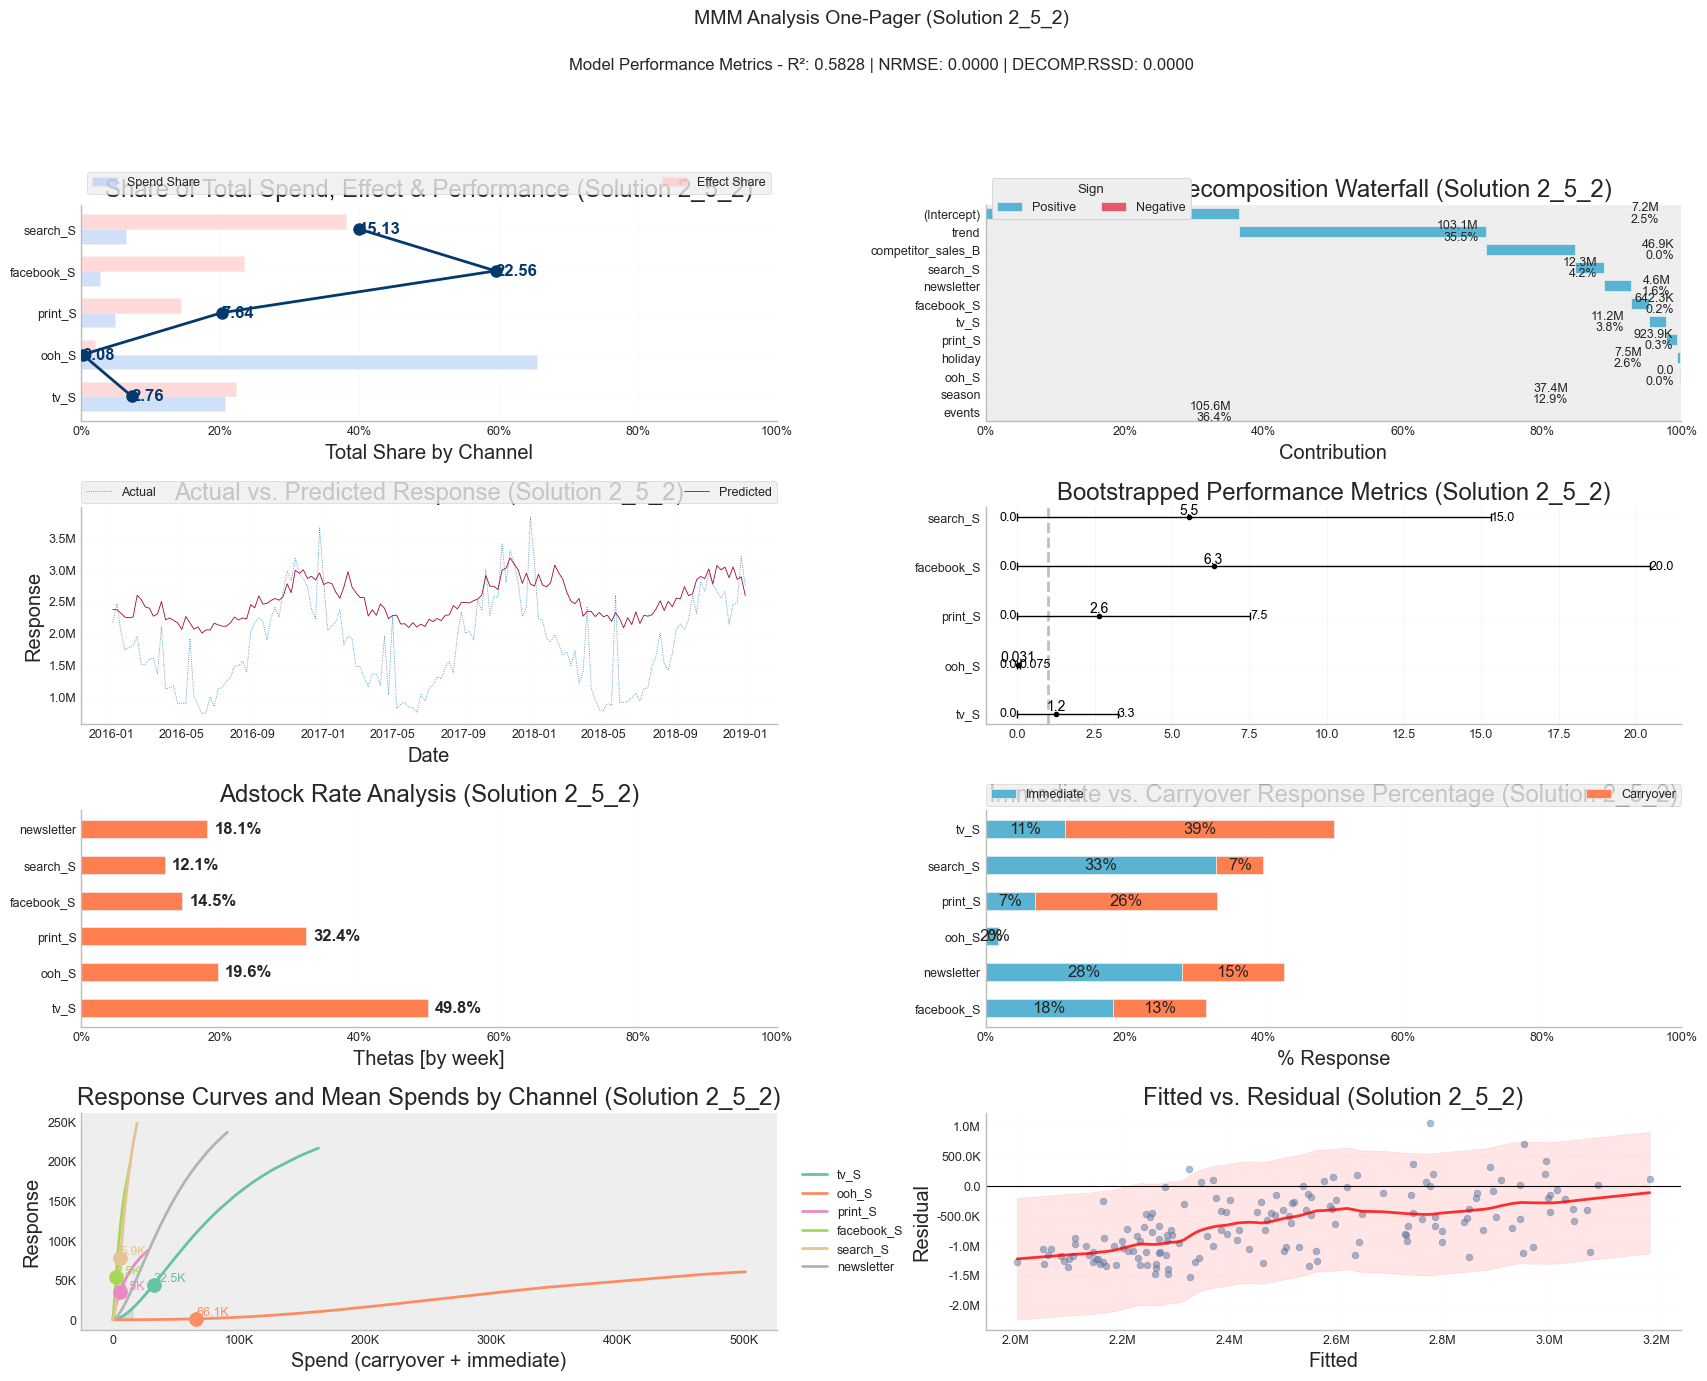

In [17]:
from robyn.data.entities.enums import AdstockType
from robyn.reporting.onepager_reporting import OnePager

visualizer = OnePager(
    pareto_result=filtered_pareto_results,
    clustered_result=cluster_results,
    adstock=AdstockType.GEOMETRIC,
    mmm_data=mmm_data,
    holidays_data=holidays_data,
)
visualizer.generate_one_pager(top_pareto=True)

# Allocator

In [18]:
from robyn.allocator.entities.allocation_constraints import AllocationConstraints
from robyn.allocator.entities.allocation_config import AllocationConfig
from robyn.allocator.entities.enums import OptimizationScenario, ConstrMode
from robyn.allocator.budget_allocator import BudgetAllocator
from robyn.visualization.allocator_plotter import AllocationPlotter


# Define allocation constraints
channel_constraints = AllocationConstraints(
    channel_constr_low={
        "tv_S": 0.7,  # -30% from base
        "ooh_S": 0.7,
        "print_S": 0.7,
        "facebook_S": 0.7,
        "search_S": 0.7,
    },
    channel_constr_up={
        "tv_S": 1.2,  # +20% from base
        "ooh_S": 1.5,  # +50% from base
        "print_S": 1.5,
        "facebook_S": 1.5,
        "search_S": 1.5,
    },
    channel_constr_multiplier=3.0,
)
# Configure allocation scenario
allocator_config = AllocationConfig(
    scenario=OptimizationScenario.MAX_RESPONSE,
    constraints=channel_constraints,
    date_range="last",  # Use last period as initial
    total_budget=None,  # Use historical budget
    maxeval=100000,
    optim_algo="SLSQP_AUGLAG",
    constr_mode=ConstrMode.EQUALITY,
)
select_model: str = None
if select_model is None:
    select_model = list(pareto_result.pareto_solutions)[0]

# Initialize budget allocator
allocator = BudgetAllocator(
    mmm_data=mmm_data,
    featurized_mmm_data=featurized_mmm_data,
    pareto_result=filtered_pareto_results,
    select_model=select_model,
)

2024-11-18 16:02:29,019 - robyn.allocator.budget_allocator - INFO - Initializing BudgetAllocator
2024-11-18 16:02:29,021 - robyn.allocator.media_response - INFO - Initializing MediaResponseParamsCalculator
2024-11-18 16:02:29,021 - robyn.allocator.allocation_optimizer - INFO - Initializing AllocationOptimizer
2024-11-18 16:02:29,021 - robyn.allocator.media_response - INFO - Starting media response parameters calculation for model 1_3_1
2024-11-18 16:02:29,024 - robyn.allocator.media_response - INFO - Successfully calculated media response parameters: MediaResponseParameters(alphas=5 channels, inflexions=5 channels, coefficients=5 channels)
2024-11-18 16:02:29,024 - robyn.allocator.budget_allocator - INFO - BudgetAllocator initialization completed successfully


In [19]:
# Run optimization
result = allocator.allocate(allocator_config)

2024-11-18 16:02:29,028 - robyn.allocator.budget_allocator - INFO - Starting budget allocation optimization
2024-11-18 16:02:29,030 - robyn.allocator.budget_allocator - WARNING - Found zero mean spend for channels: ['tv_S' 'ooh_S' 'print_S' 'search_S']
2024-11-18 16:02:29,031 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -0.0064
2024-11-18 16:02:29,032 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -0.0269
2024-11-18 16:02:29,032 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -0.4144
2024-11-18 16:02:29,032 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -1.9937
2024-11-18 16:02:29,033 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -3.7286
2024-11-18 16:02:29,033 - robyn.allocator.budget_allocator - INFO - Initial metrics calculated successfully
2024-11-18 16:02:29,033 - robyn.allocator.bu

In [20]:
# Print results
print(
    f"""
    Model ID: {select_model}
    Scenario: {allocator_config.scenario}
    Use case: {result.metrics.get('use_case', '')}
    Window: {result.metrics.get('date_range_start')}:{result.metrics.get('date_range_end')} ({result.metrics.get('n_periods')} {mmm_data.mmmdata_spec.interval_type})
    Dep. Variable Type: {mmm_data.mmmdata_spec.dep_var_type}
    Media Skipped: {result.metrics.get('skipped_channels', 'None')}
    Relative Spend Increase: {result.metrics.get('spend_lift_pct', 0):.1f}% ({result.metrics.get('spend_lift_abs', 0):+.0f}K)
    Total Response Increase (Optimized): {result.metrics.get('response_lift', 0)*100:.1f}%
    Allocation Summary:
    """
)
# Print channel-level results
for channel in mmm_data.mmmdata_spec.paid_media_spends:
    current = result.optimal_allocations[result.optimal_allocations["channel"] == channel].iloc[0]
    print(
        f"""
        - {channel}:
            Optimizable bound: [{(current['constr_low']-1)*100:.0f}%, {(current['constr_up']-1)*100:.0f}%],
            Initial spend share: {current['current_spend_share']*100:.2f}% -> Optimized bounded: {current['optimal_spend_share']*100:.2f}%
            Initial response share: {current['current_response_share']*100:.2f}% -> Optimized bounded: {current['optimal_response_share']*100:.2f}%
            Initial abs. mean spend: {current['current_spend']/1000:.3f}K -> Optimized: {current['optimal_spend']/1000:.3f}K [Delta = {(current['optimal_spend']/current['current_spend']-1)*100:.0f}%]
        """
    )
# Display the allocation result
print(result)


    Model ID: 1_3_1
    Scenario: max_response
    Use case: 
    Window: 2019-11-11 00:00:00:2019-11-11 00:00:00 (1 week)
    Dep. Variable Type: revenue
    Media Skipped: None
    Relative Spend Increase: 0.0% (+0K)
    Total Response Increase (Optimized): 7.6%
    Allocation Summary:
    

        - tv_S:
            Optimizable bound: [-30%, 20%],
            Initial spend share: 7.14% -> Optimized bounded: 5.00%
            Initial response share: 0.01% -> Optimized bounded: 0.00%
            Initial abs. mean spend: 1.221K -> Optimized: 0.854K [Delta = -30%]
        

        - ooh_S:
            Optimizable bound: [-30%, 50%],
            Initial spend share: 7.14% -> Optimized bounded: 5.00%
            Initial response share: 0.07% -> Optimized bounded: 0.04%
            Initial abs. mean spend: 1.221K -> Optimized: 0.854K [Delta = -30%]
        

        - print_S:
            Optimizable bound: [-30%, 50%],
            Initial spend share: 7.14% -> Optimized bounded: 5.00%

### Scenario 3: Default Target Efficiency (Target ROAS or CPA)

In [21]:
print("\nScenario 3: Target efficiency optimization")

# Create constraints matching R's implementation
default_channel_constraints = AllocationConstraints(
    channel_constr_low={
        channel: 0.1 for channel in mmm_data.mmmdata_spec.paid_media_spends  # -90% from base for all channels
    },
    channel_constr_up={
        channel: 10.0 for channel in mmm_data.mmmdata_spec.paid_media_spends  # +900% from base for all channels
    },
    channel_constr_multiplier=1.0,  # Don't extend bounds for target efficiency
    is_target_efficiency=True,  # Flag this as target efficiency scenario
)

# Create configuration for target efficiency scenario
target_efficiency_config = AllocationConfig(
    scenario=OptimizationScenario.TARGET_EFFICIENCY,
    constraints=default_channel_constraints,
    date_range="all",  # Use all dates like in R version
    target_value=None,  # Will use default 80% of initial ROAS or 120% of initial CPA
    maxeval=100000,
    optim_algo="SLSQP_AUGLAG",
    constr_mode=ConstrMode.EQUALITY,
    plots=True,
)

# Run optimization
result3 = allocator.allocate(target_efficiency_config)

2024-11-18 16:02:29,085 - robyn.allocator.budget_allocator - INFO - Starting budget allocation optimization
2024-11-18 16:02:29,088 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -0.1174
2024-11-18 16:02:29,089 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -0.0504
2024-11-18 16:02:29,090 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -0.6181
2024-11-18 16:02:29,090 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -3.6901
2024-11-18 16:02:29,090 - robyn.allocator.response_calculator - INFO - Successfully calculated gradient value: -2.8875
2024-11-18 16:02:29,091 - robyn.allocator.budget_allocator - INFO - Initial metrics calculated successfully
2024-11-18 16:02:29,091 - robyn.allocator.budget_allocator - INFO - Running optimization for scenario: OptimizationScenario.TARGET_EFFICIENCY
2024-11-18 16:02:29,091 - robyn.allocator.budge


Scenario 3: Target efficiency optimization


In [22]:
# Print results matching R format
print(
    f"""
Model ID: {select_model}
Scenario: {target_efficiency_config.scenario}
Use case: {result3.metrics.get('use_case', '')}
Window: {result3.metrics.get('date_range_start')}:{result3.metrics.get('date_range_end')} ({result3.metrics.get('n_periods')} {mmm_data.mmmdata_spec.interval_type})

Dep. Variable Type: {mmm_data.mmmdata_spec.dep_var_type}
Media Skipped: {result3.metrics.get('skipped_channels', 'None')}
Relative Spend Increase: {result3.metrics.get('spend_lift_pct', 0):.0f}% ({result3.metrics.get('spend_lift_abs', 0):.0f})
Total Response Increase (Optimized): {result3.metrics.get('response_lift', 0)*100:.0f}%

Allocation Summary:
"""
)

# Print channel-level results
for channel in mmm_data.mmmdata_spec.paid_media_spends:
    current = result3.optimal_allocations[result3.optimal_allocations["channel"] == channel].iloc[0]

    print(
        f"""
- {channel}:
  Optimizable bound: [{(current['constr_low']-1)*100:.0f}%, {(current['constr_up']-1)*100:.0f}%],
  Initial spend share: {current['current_spend_share']*100:.2f}% -> Optimized bounded: {current['optimal_spend_share']*100:.2f}%
  Initial response share: {current['current_response_share']*100:.2f}% -> Optimized bounded: {current['optimal_response_share']*100:.2f}%
  Initial abs. mean spend: {current['current_spend']/1000:.3f}K -> Optimized: {current['optimal_spend']/1000:.3f}K [Delta = {(current['optimal_spend']/current['current_spend']-1)*100:.0f}%]
"""
    )


Model ID: 1_3_1
Scenario: target_efficiency
Use case: all_historical_vec + historical_budget
Window: 2015-11-23 00:00:00:2019-11-11 00:00:00 (208 week)

Dep. Variable Type: revenue
Media Skipped: None
Relative Spend Increase: 600% (419)
Total Response Increase (Optimized): 460%

Allocation Summary:


- tv_S:
  Optimizable bound: [-90%, 900%],
  Initial spend share: 21.25% -> Optimized bounded: 30.35%
  Initial response share: 2.65% -> Optimized bounded: 24.67%
  Initial abs. mean spend: 14.844K -> Optimized: 148.437K [Delta = 900%]


- ooh_S:
  Optimizable bound: [-90%, 900%],
  Initial spend share: 61.87% -> Optimized bounded: 45.55%
  Initial response share: 6.31% -> Optimized bounded: 5.63%
  Initial abs. mean spend: 43.218K -> Optimized: 222.796K [Delta = 416%]


- print_S:
  Optimizable bound: [-90%, 900%],
  Initial spend share: 5.34% -> Optimized bounded: 7.62%
  Initial response share: 5.55% -> Optimized bounded: 11.46%
  Initial abs. mean spend: 3.729K -> Optimized: 37.286K [

2024-11-18 16:02:29,173 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-18 16:02:29,173 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-18 16:02:29,174 - robyn.visualization.allocator_plotter - INFO - AllocationPlotter initialized successfully with result: AllocationResult(
Total Current Spend: $17,088.90
Total Optimal Spend: $17,088.90
Spend Lift: +0.0%
Response Lift: +7.6%)
2024-11-18 16:02:29,174 - robyn.visualization.base_visualizer - INFO - Initializing BaseVisualizer with style: bmh
2024-11-18 16:02:29,175 - robyn.visualization.base_visualizer - INFO - BaseVisualizer initialization completed
2024-11-18 16:02:29,175 - robyn.visualization.allocator_plotter - INFO - AllocationPlotter initialized successfully with result: AllocationResult(
Total Current Spend: $69,851.44
Total Optimal Spend: $489,130.82
Spend Lift: +600.2%
Response Lift: +460.2%)
2024-11-18 16:02:29,175 - robyn.visualiza

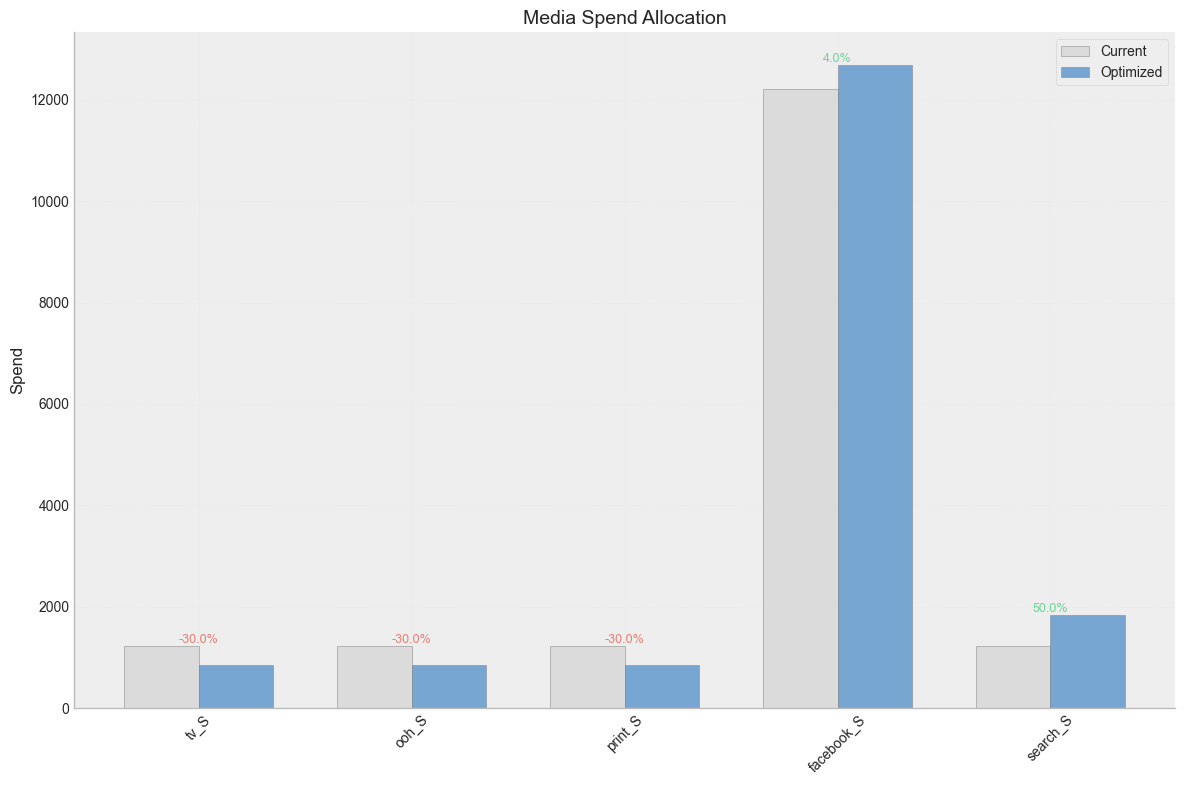

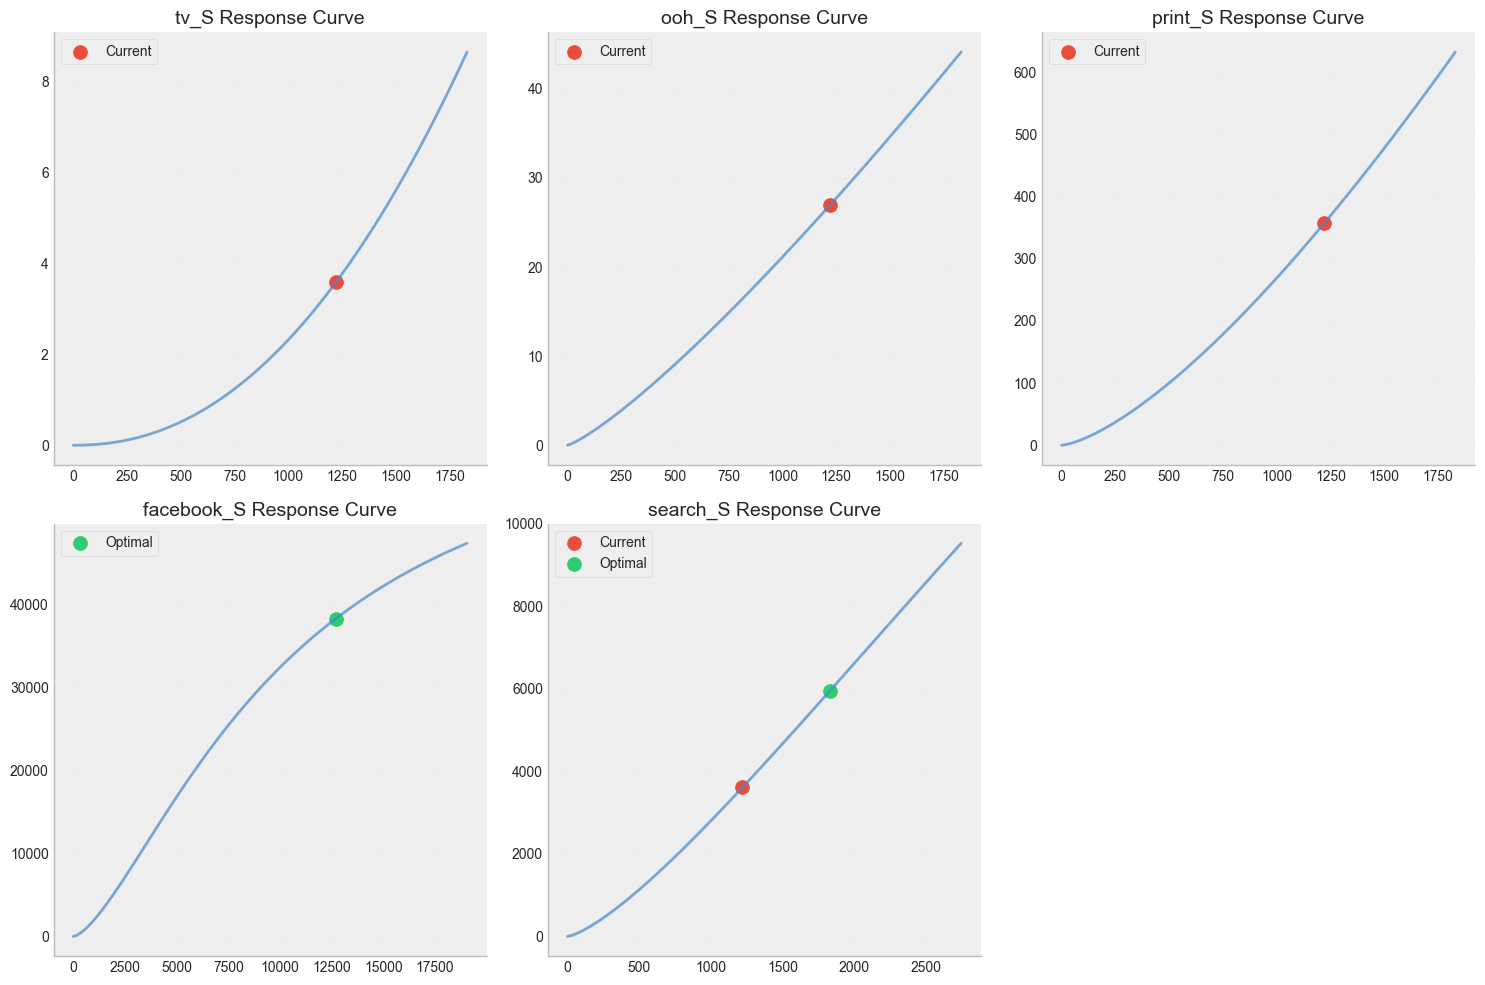

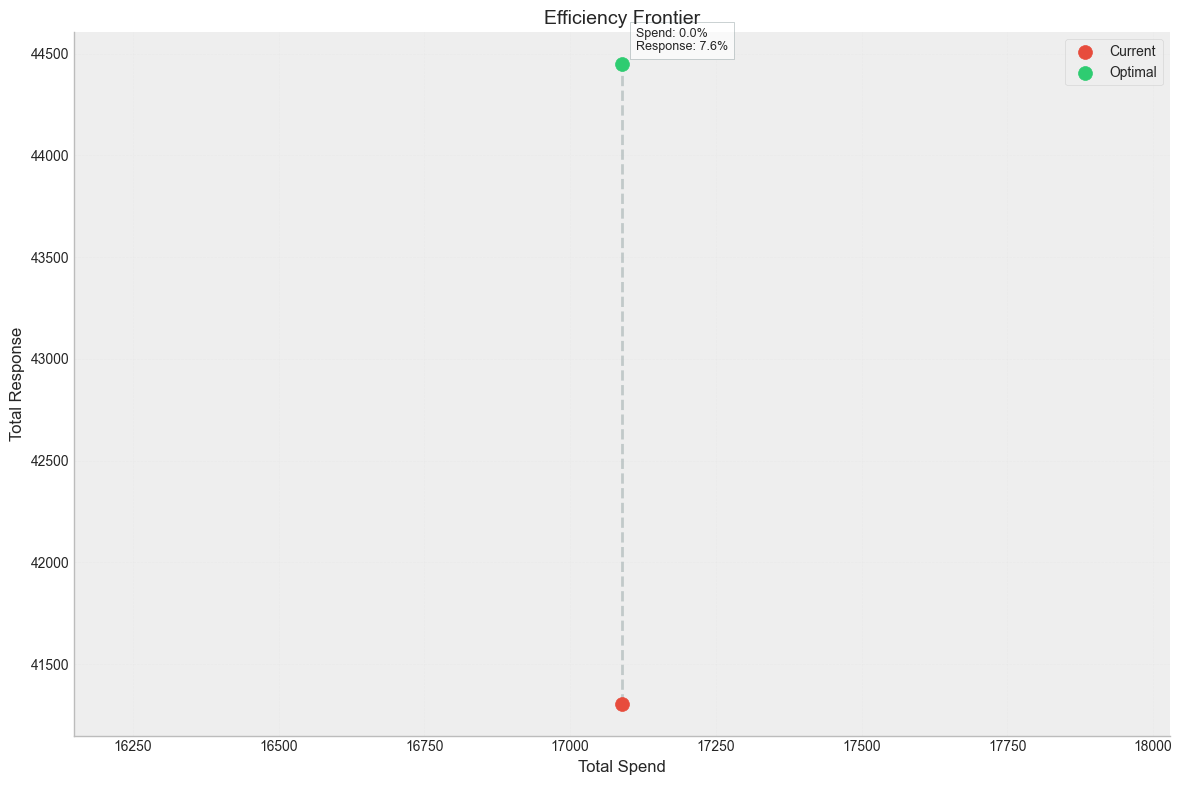

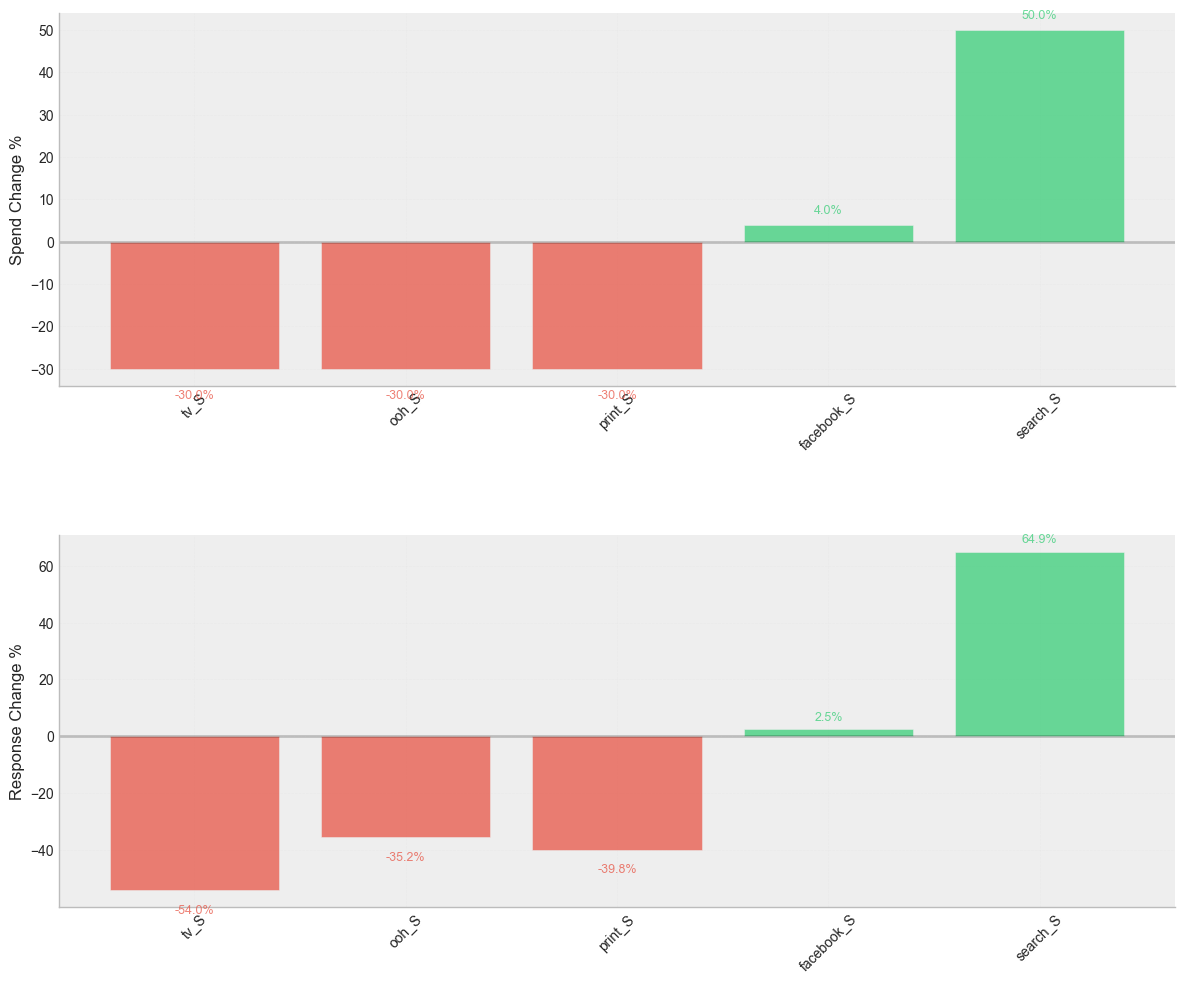

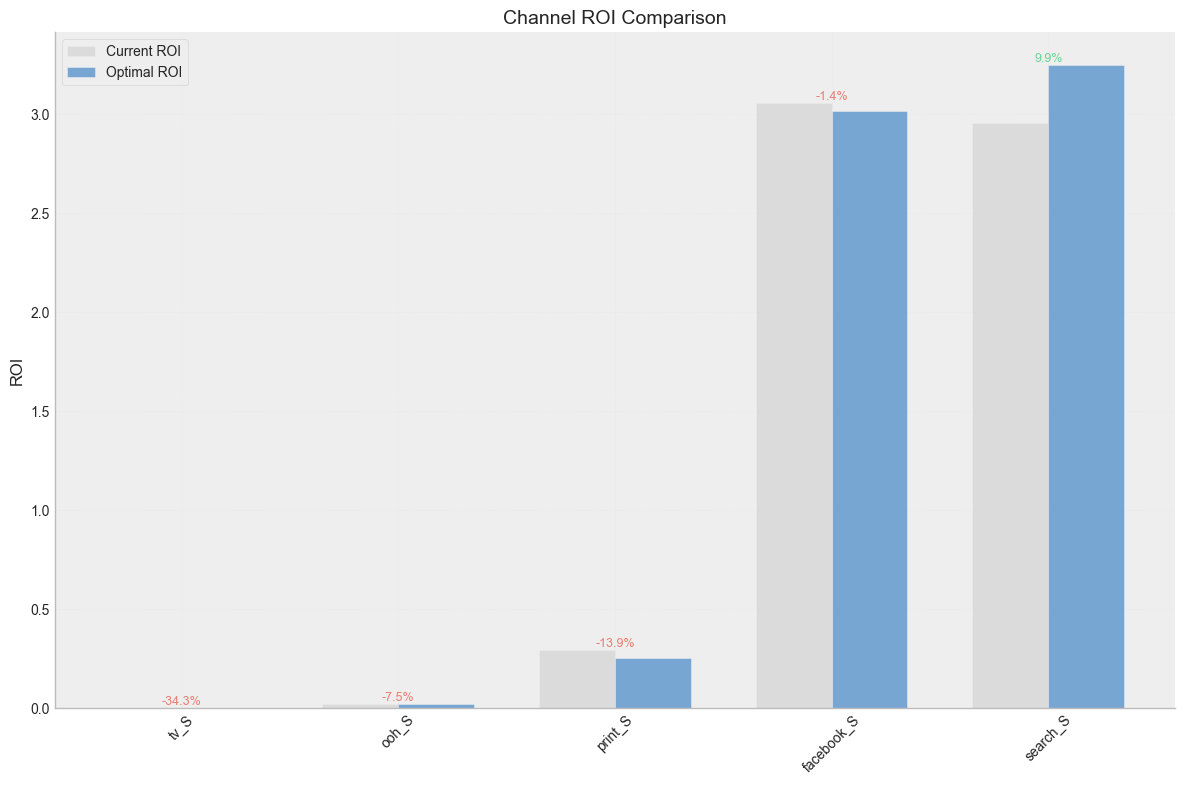

2024-11-18 16:02:30,299 - robyn.visualization.allocator_plotter - INFO - Starting to generate all allocation plots
2024-11-18 16:02:30,299 - robyn.visualization.base_visualizer - INFO - Creating new figure with dimensions 1x1
2024-11-18 16:02:30,310 - robyn.visualization.base_visualizer - INFO - Finalizing figure with tight_layout=True, adjust_spacing=False
2024-11-18 16:02:30,328 - robyn.visualization.allocator_plotter - INFO - Spend allocation plot generated successfully
2024-11-18 16:02:30,328 - robyn.visualization.base_visualizer - INFO - Creating new figure with dimensions 2x3
2024-11-18 16:02:30,366 - robyn.visualization.base_visualizer - INFO - Finalizing figure with tight_layout=True, adjust_spacing=False
2024-11-18 16:02:30,460 - robyn.visualization.allocator_plotter - INFO - Response curves plot generated successfully
2024-11-18 16:02:30,460 - robyn.visualization.base_visualizer - INFO - Creating new figure with dimensions 1x1
2024-11-18 16:02:30,468 - robyn.visualization.bas

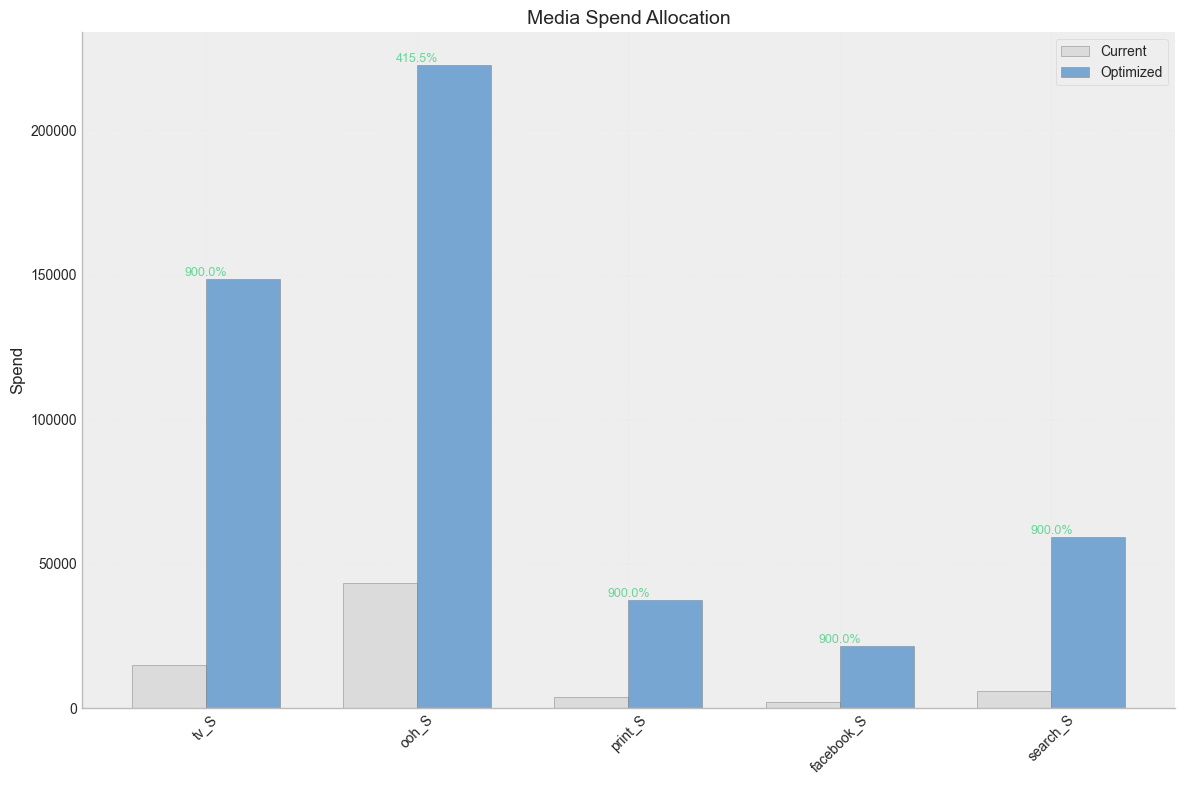

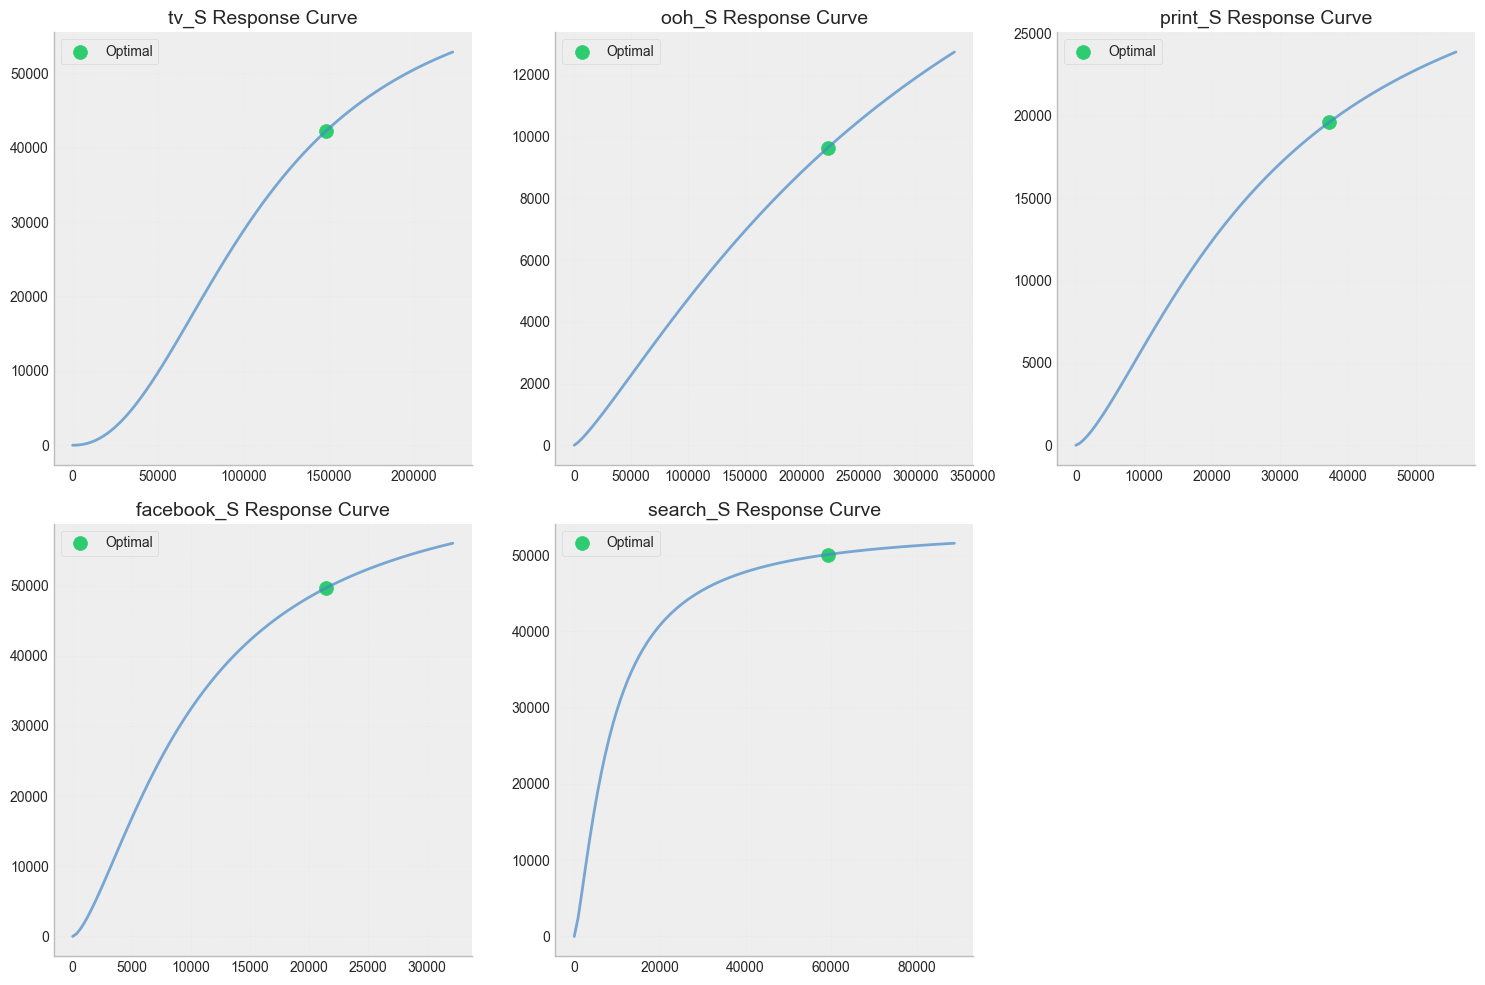

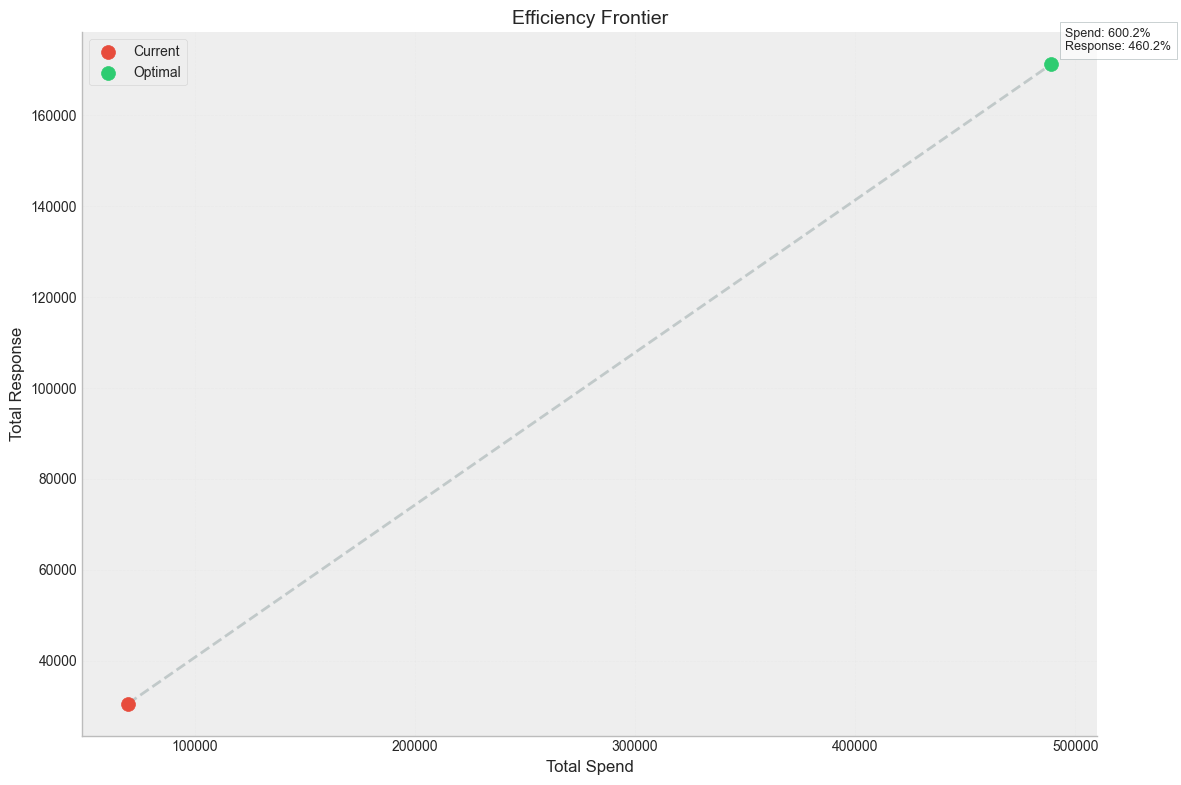

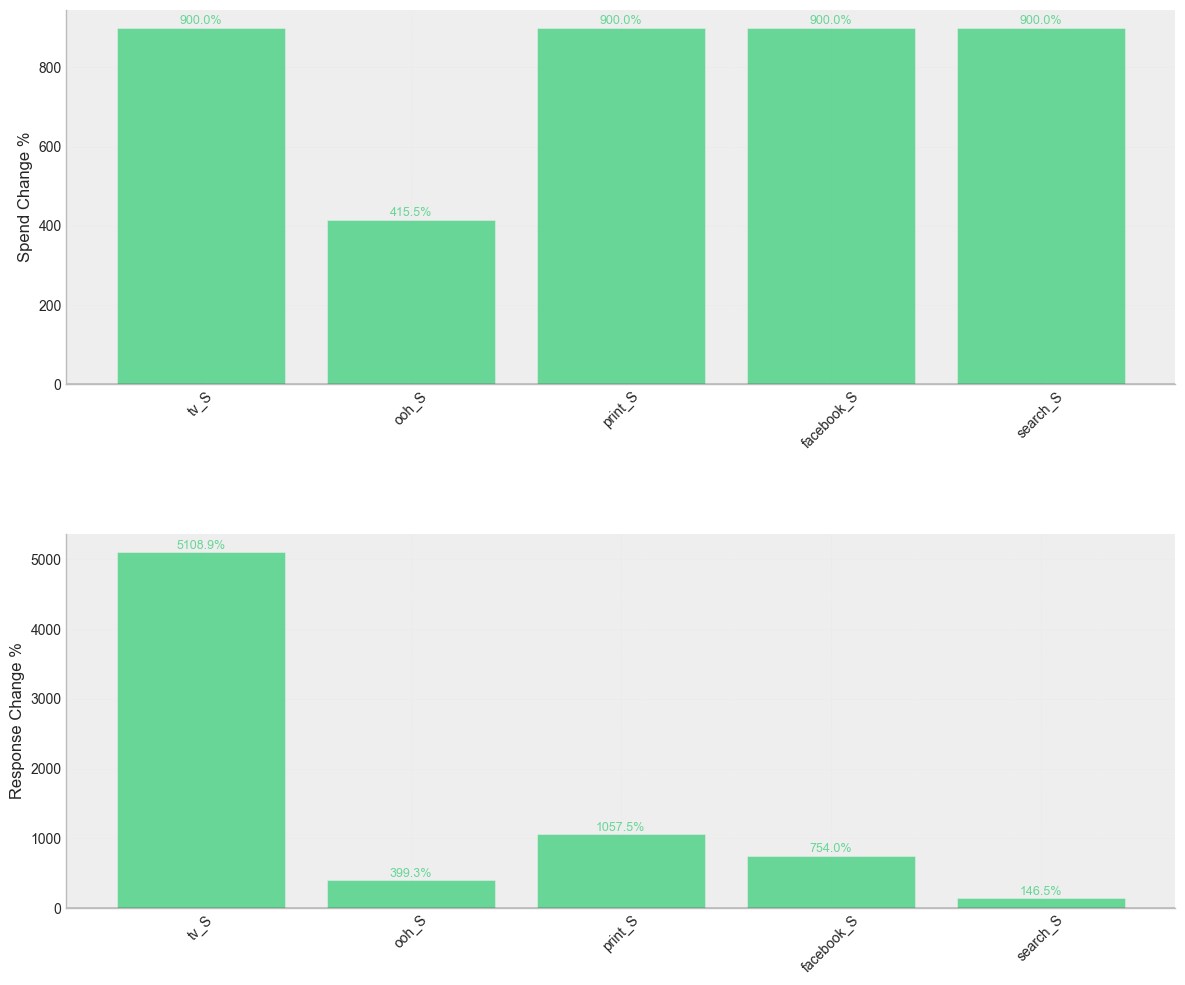

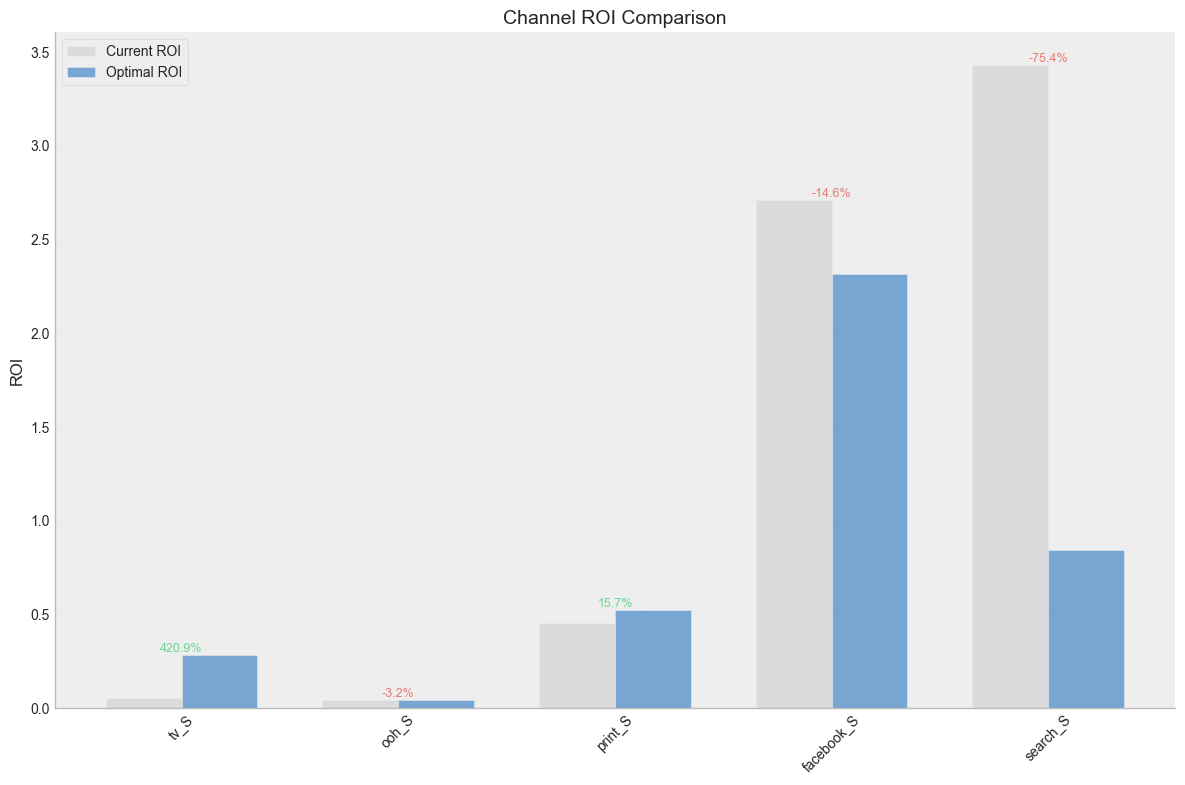

Max Response Scenario Plots:
--------------------------------------------------


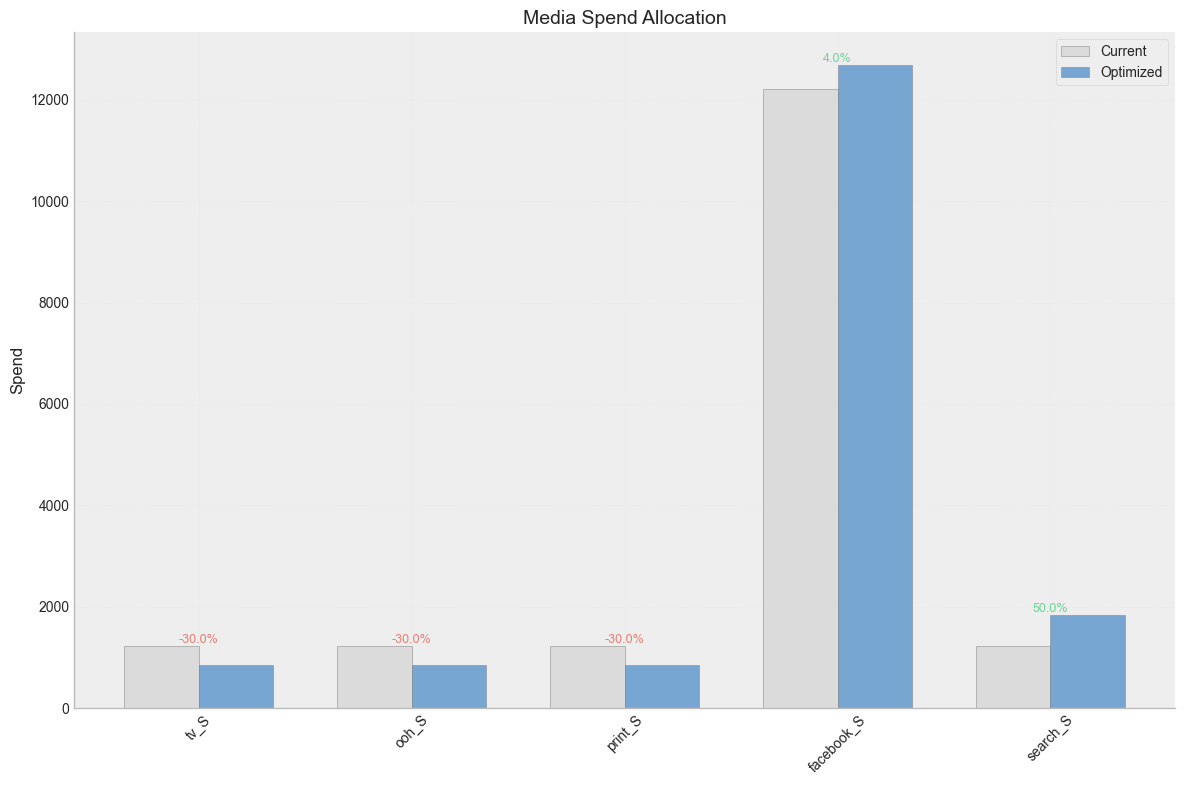

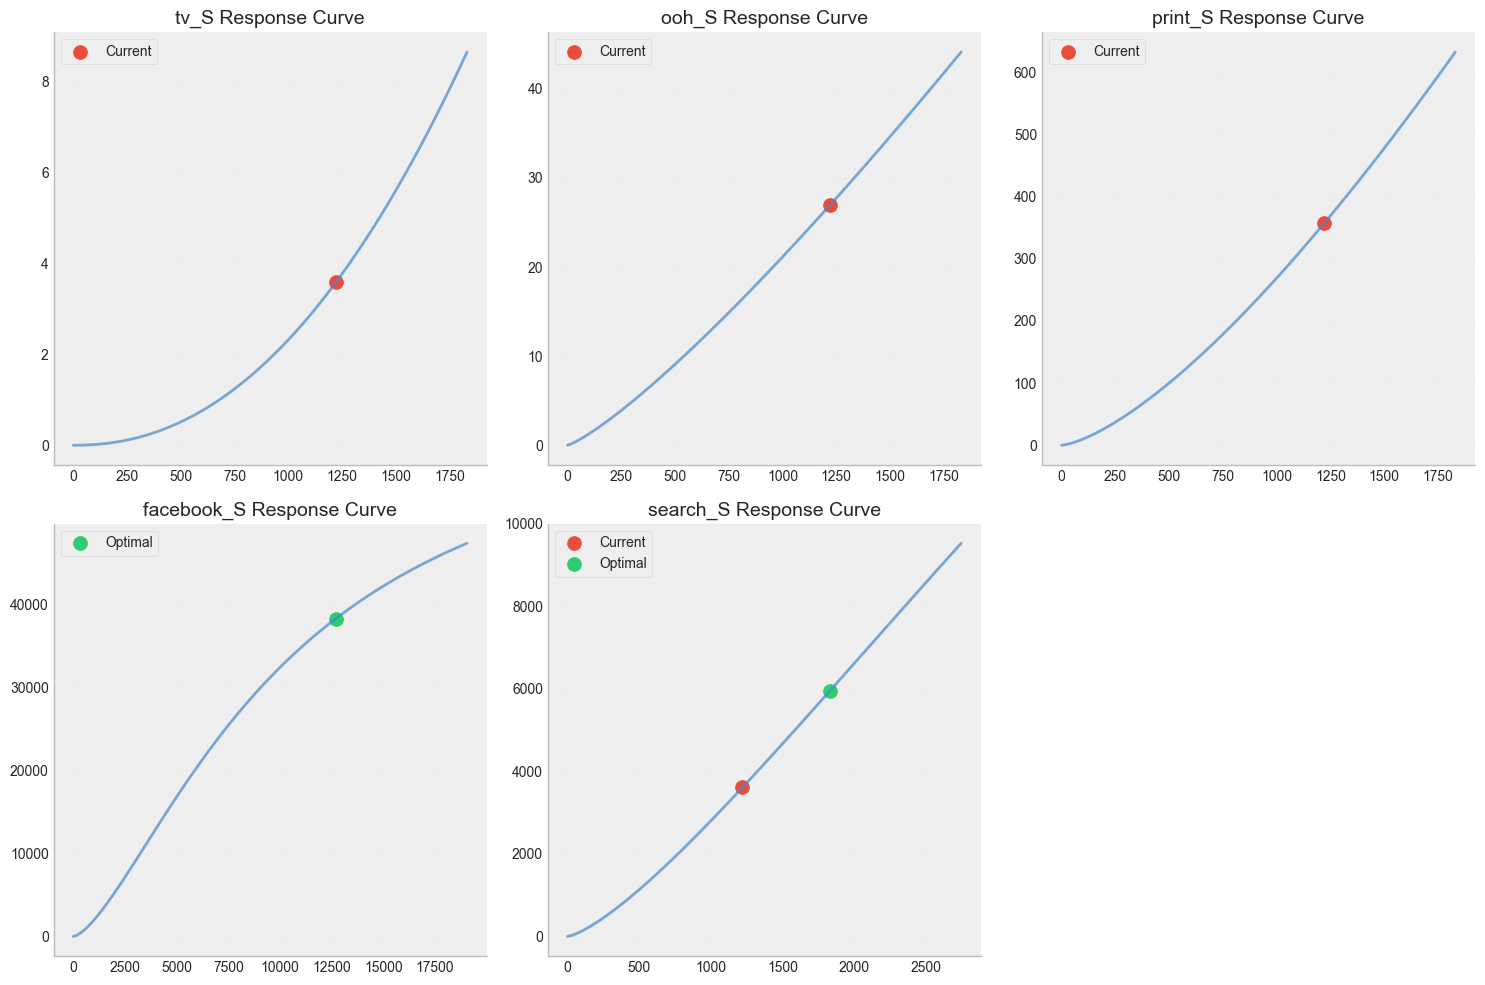

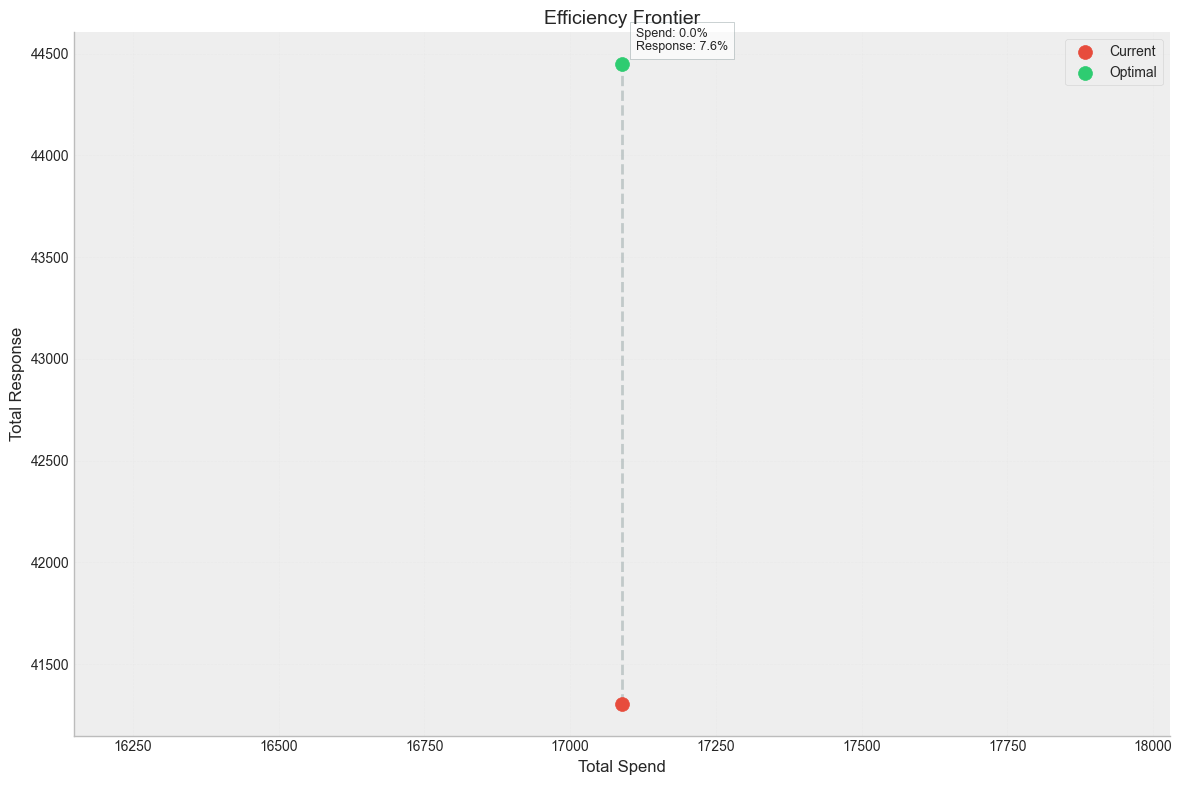

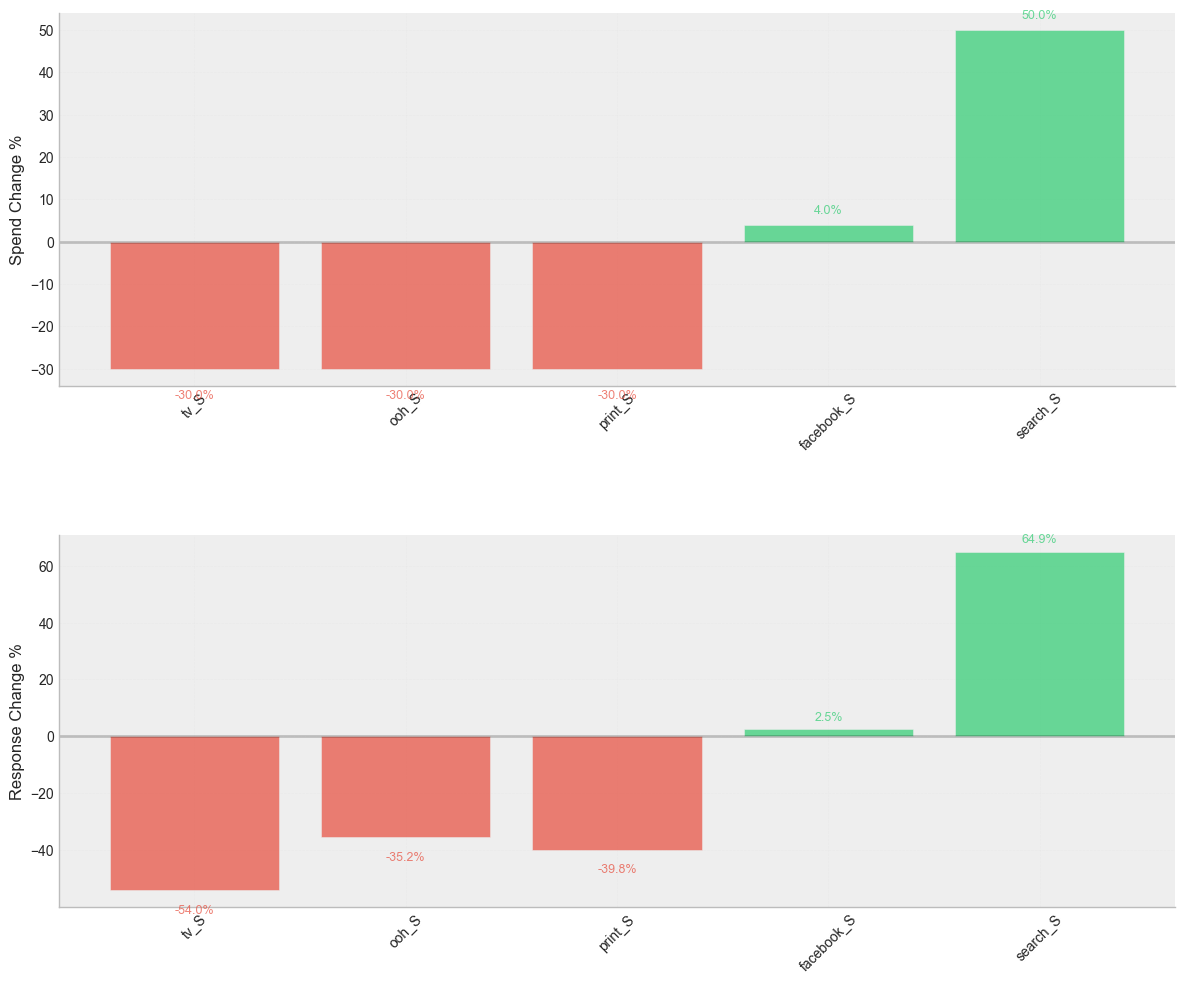

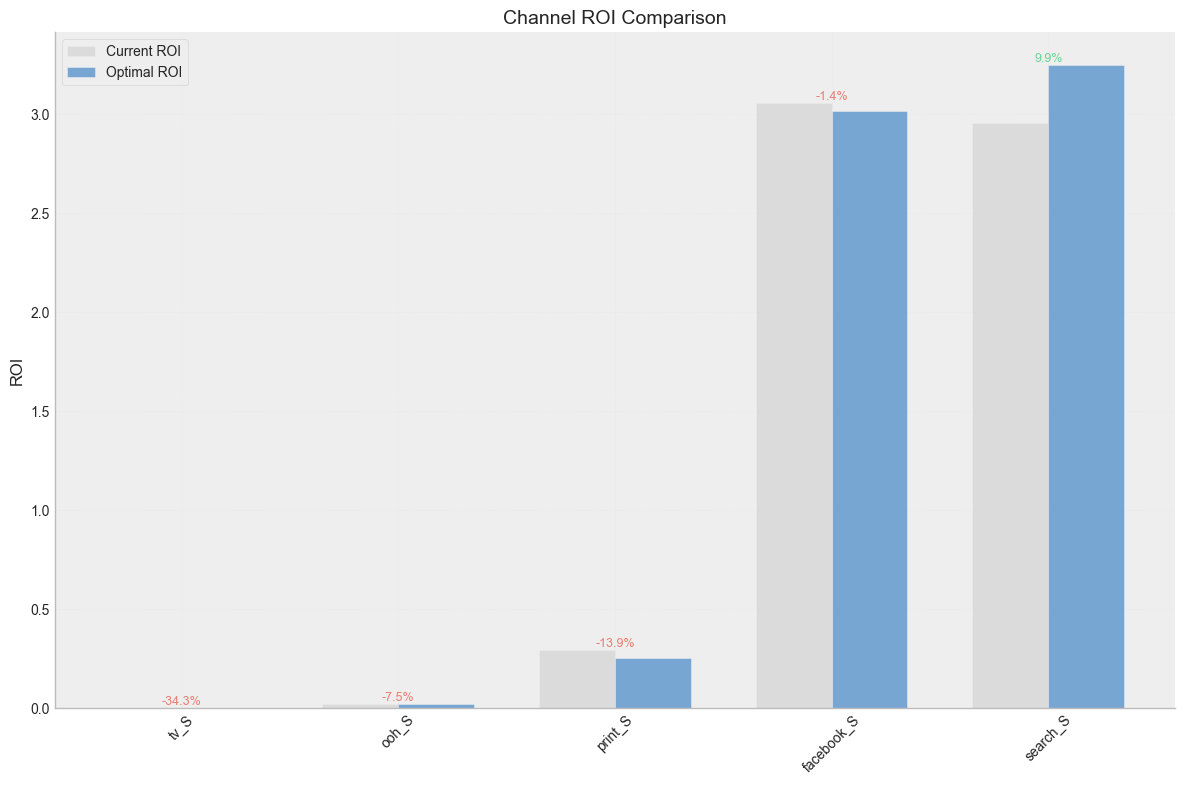


Target Efficiency Scenario Plots:
--------------------------------------------------


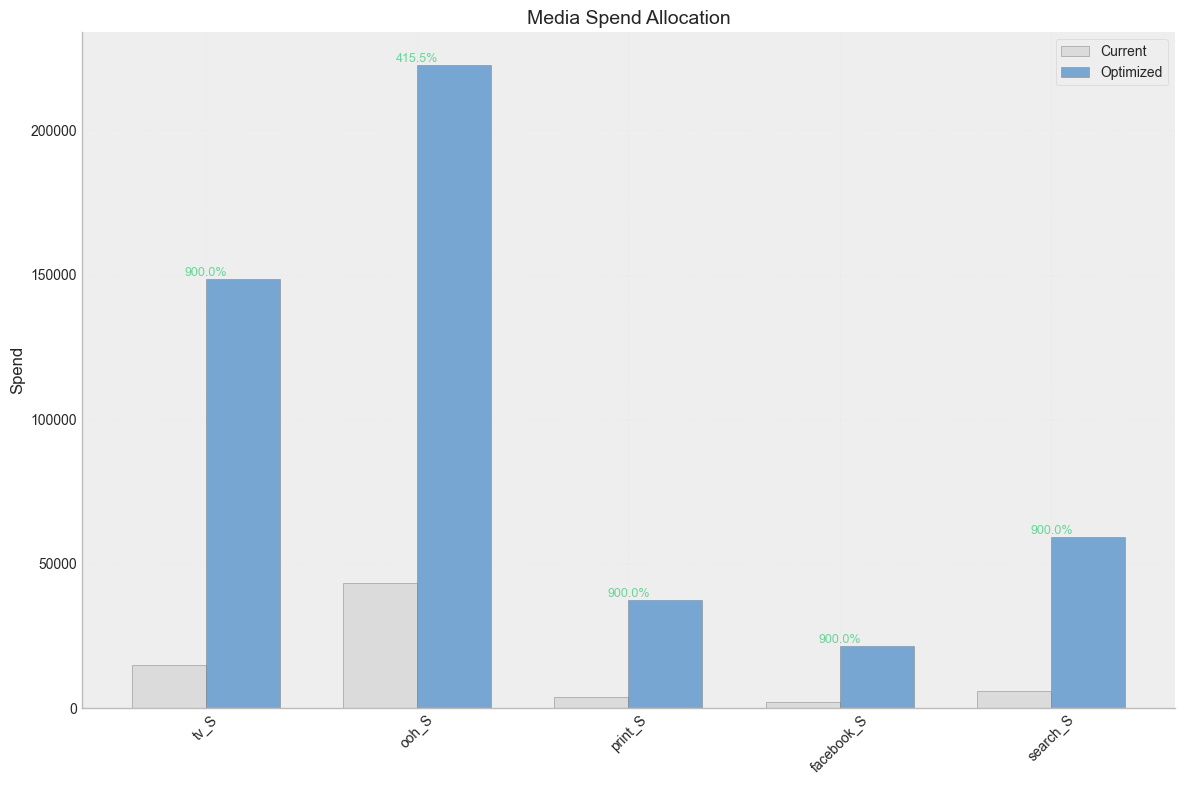

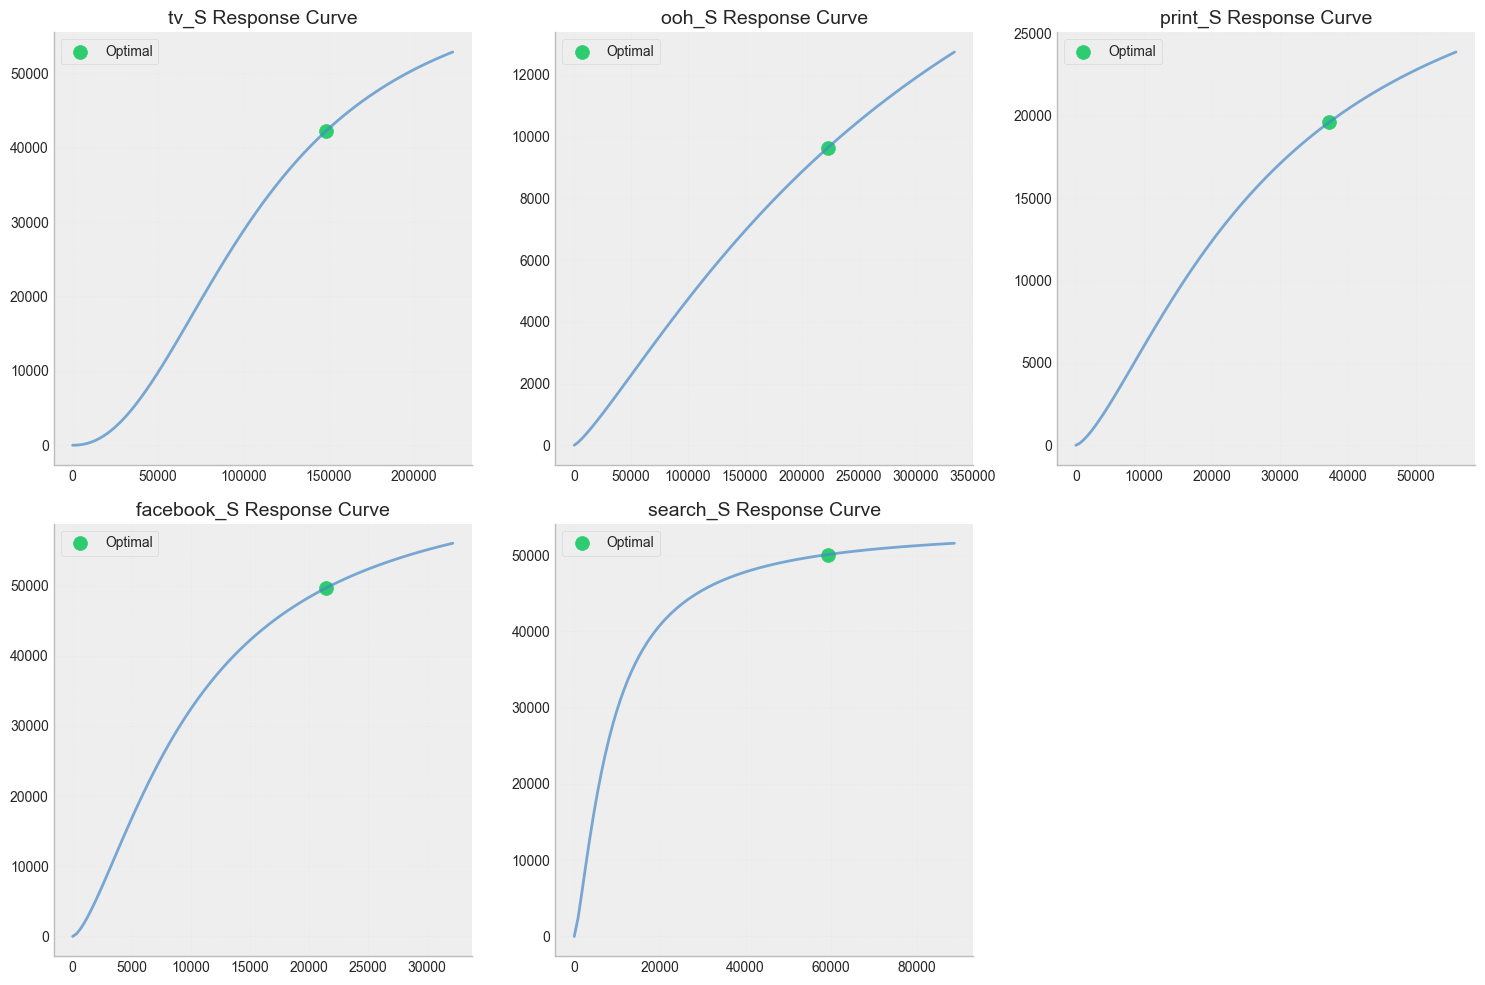

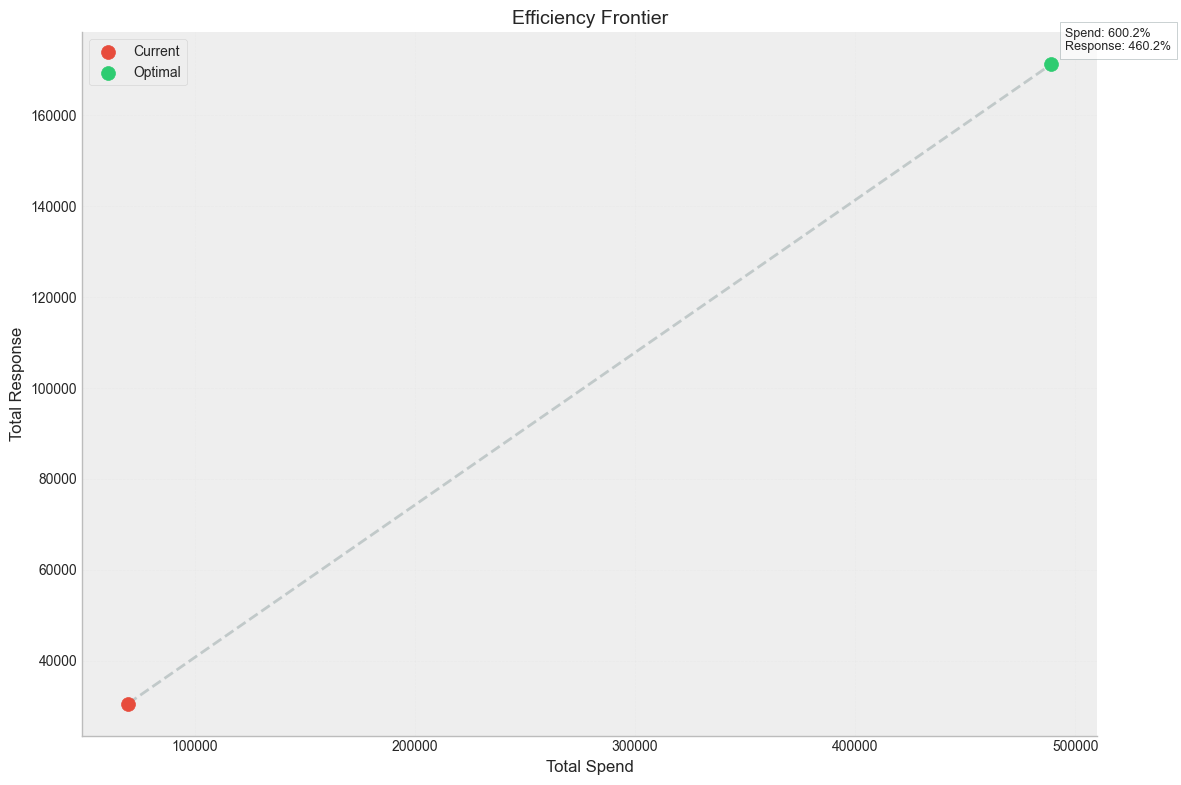

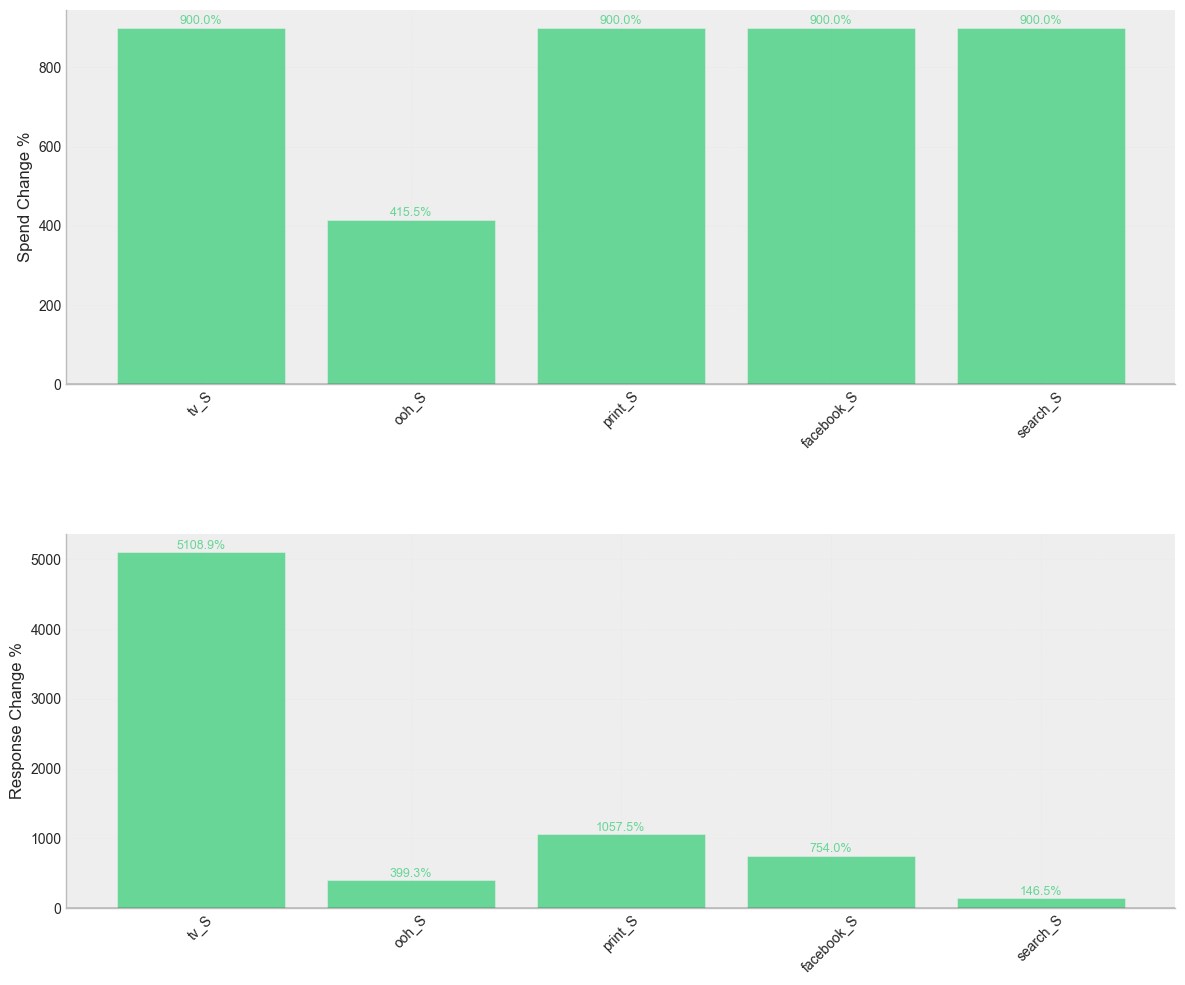

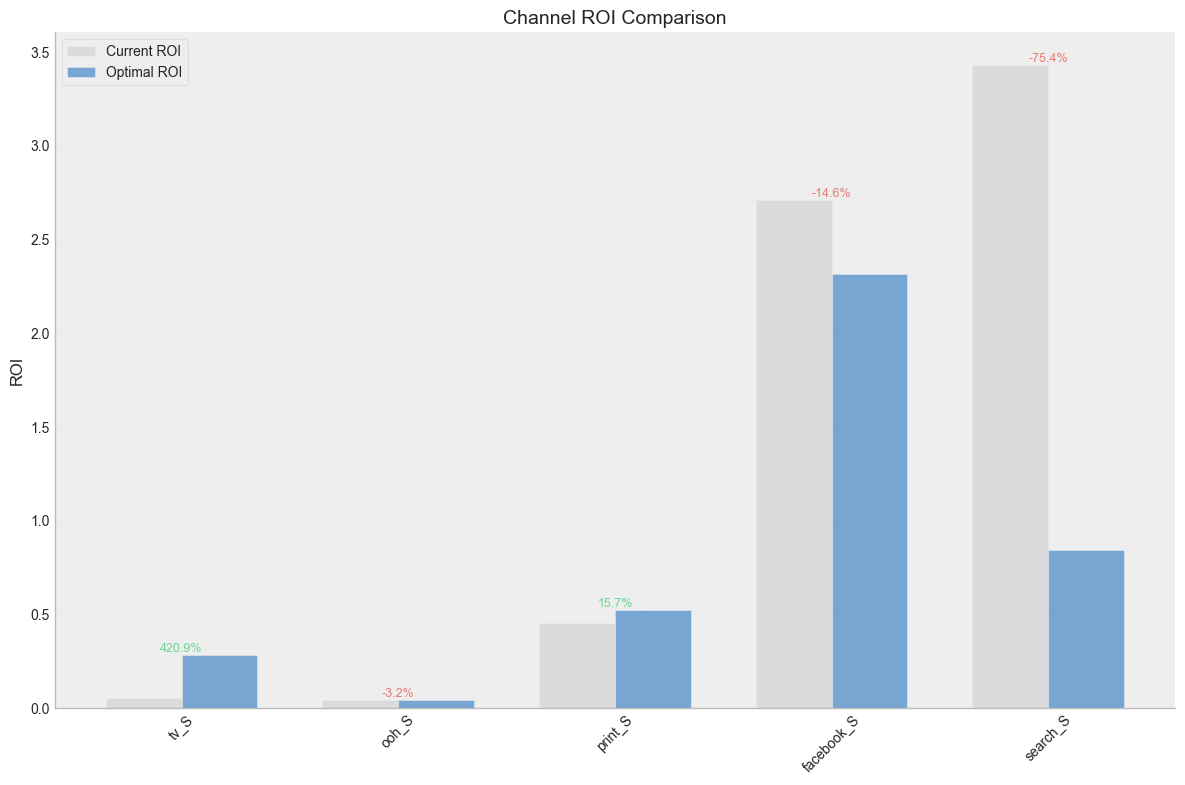

In [23]:
# Create visualizations for each scenario
max_response_plotter = AllocationPlotter(result)
target_efficiency_plotter = AllocationPlotter(result3)

# Generate plots
max_response_plots = max_response_plotter.plot_all()
target_efficiency_plots = target_efficiency_plotter.plot_all()

# Display plots
print("Max Response Scenario Plots:")
print("-" * 50)
for plot_name, fig in max_response_plots.items():
    display(fig)


print("\nTarget Efficiency Scenario Plots:")
print("-" * 50)
for plot_name, fig in target_efficiency_plots.items():
    display(fig)